<a href="https://colab.research.google.com/github/Dattasai134/EDA-/blob/main/Steel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import normaltest, boxcox

In [27]:
df = pd.read_csv('Steel_Data.csv')
df.head()

,Srno,Date_time,Heat_no,Grade,Section_IC,Coke_Injection_Qty_1,Coke_Injection_Qty_2,BSM,SKULL,BP,...,STATIC_WT,LIME,O2SIDE1,O2SIDE2,O2SIDE3,PREV_TAP_TIME,TAP_DURATION,Pour_Back_Metal,LM_WT,Production_MT
0,1,01-Sep-23,44664,38MnSiVS6,C,-0.080407,0.139754,2,0,2,...,7.4,0.928890,1028.9660,803.6121,814.6359,NaN,281,4.0,4.488976,55.146
1,2,01-Sep-23,44665,38MnSiVS6,C,-0.001536,0.273833,2,0,2,...,8.7,0.504364,1177.2710,1155.5310,884.1646,01-09-2023 01:27,265,0.0,4.484111,53.350
2,3,01-Sep-23,44666,AISI430L,C,0.000000,0.031453,2,0,2,...,8.7,1.642595,631.7444,665.3335,518.7522,01-09-2023 03:16,177,0.0,4.464656,51.872
3,4,01-Sep-23,44667,38MNSIVS5,C,0.060635,0.082523,2,0,2,...,7.2,1.133362,740.4547,784.2643,635.3218,01-09-2023 03:59,362,0.0,4.565175,56.189
4,5,01-Sep-23,44668,38MNSIVS5,C,0.296792,0.074254,2,0,2,...,5.8,0.512155,804.2347,770.0343,524.2801,01-09-2023 04:49,245,0.0,4.653048,55.174


In [28]:
df.isnull().sum()

Srno               0
Date_time          0
Heat_no            0
Grade              0
Section_IC         0
                  ..
PREV_TAP_TIME      3
TAP_DURATION       0
Pour_Back_Metal    0
LM_WT              0
Production_MT      1
Length: 63, dtype: int64

In [29]:
# Identify ratio data type columns
ratio_cols = df.select_dtypes(include=['float64']).columns

# Print the ratio data type columns
print(ratio_cols)

Index(['Coke_Injection_Qty_1', 'Coke_Injection_Qty_2', 'DRI1_QTY_MT',
       'DRI2_QTY_MT', 'TOT_DRI_QTY', 'Hot_Metal', 'Total_Charge', 'Hot_Heel',
       'DOLO', 'DOLO1_EMPTY', 'TOT_LIME_QTY', 'O2ACT', 'Energy_Consumption',
       'KWH_PER_TON', 'MELT_TIME', 'TA_TIME', 'TT_TIME', 'E1_CUR', 'E2_CUR',
       'E3_CUR', 'SPOUT', 'C', 'SI', 'MN', 'P', 'S', 'CU', 'CR', 'NI', 'N',
       'OPEN_C', 'TAP_C', 'IT_KG', 'STATIC_WT', 'LIME', 'O2SIDE1', 'O2SIDE2',
       'O2SIDE3', 'Pour_Back_Metal', 'LM_WT', 'Production_MT'],
      dtype='object')


In [30]:
# Calculate the required statistics for ratio columns
ratio_stats = df[ratio_cols].agg(['mean', 'median', 'std', 'var', 'skew', 'kurtosis'])

# Show columns as rows and rows as columns
print(ratio_stats.transpose().to_string())

                             mean       median           std           var       skew     kurtosis
Coke_Injection_Qty_1     0.014845     0.005375  1.370972e-01  1.879564e-02 -14.416629   462.429312
Coke_Injection_Qty_2     0.099721     0.083495  7.246039e-02  5.250508e-03   1.719351     7.163661
DRI1_QTY_MT              9.699181     9.528663  4.006264e+00  1.605015e+01   0.540048     1.706237
DRI2_QTY_MT              4.964610     5.022748  1.747942e+00  3.055302e+00  -1.525006     2.269573
TOT_DRI_QTY             14.663791    14.869100  4.123690e+00  1.700482e+01  -0.195441     1.082951
Hot_Metal               43.469964    43.942000  4.209100e+00  1.771652e+01  -3.960188    31.887312
Total_Charge            66.173191    66.000000  6.250036e+00  3.906295e+01   0.510428     5.592496
Hot_Heel                10.085721    10.000000  1.626228e+00  2.644616e+00   0.398727     5.334156
DOLO                     1.884903     1.923484  5.042545e-01  2.542726e-01  -0.419964     0.781264
DOLO1_EMPT

In [31]:
df

,Srno,Date_time,Heat_no,Grade,Section_IC,Coke_Injection_Qty_1,Coke_Injection_Qty_2,BSM,SKULL,BP,...,STATIC_WT,LIME,O2SIDE1,O2SIDE2,O2SIDE3,PREV_TAP_TIME,TAP_DURATION,Pour_Back_Metal,LM_WT,Production_MT
0,1,01-Sep-23,44664,38MnSiVS6,C,-0.080407,0.139754,2,0,2,...,7.4,0.928890,1028.9660,803.6121,814.6359,NaN,281,4.0,4.488976,55.146
1,2,01-Sep-23,44665,38MnSiVS6,C,-0.001536,0.273833,2,0,2,...,8.7,0.504364,1177.2710,1155.5310,884.1646,01-09-2023 01:27,265,0.0,4.484111,53.350
2,3,01-Sep-23,44666,AISI430L,C,0.000000,0.031453,2,0,2,...,8.7,1.642595,631.7444,665.3335,518.7522,01-09-2023 03:16,177,0.0,4.464656,51.872
3,4,01-Sep-23,44667,38MNSIVS5,C,0.060635,0.082523,2,0,2,...,7.2,1.133362,740.4547,784.2643,635.3218,01-09-2023 03:59,362,0.0,4.565175,56.189
4,5,01-Sep-23,44668,38MNSIVS5,C,0.296792,0.074254,2,0,2,...,5.8,0.512155,804.2347,770.0343,524.2801,01-09-2023 04:49,245,0.0,4.653048,55.174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,727,31-Aug-23,44659,SAE52100,B,0.000000,0.034695,2,0,2,...,6.2,1.009703,924.0061,851.7371,754.0983,31-08-2023 17:15,281,0.0,4.375811,56.367
2055,728,31-Aug-23,44660,SAE52100,B,0.000000,0.078956,2,0,2,...,7.2,0.221026,819.7224,798.7148,661.2683,31-08-2023 18:17,321,0.0,4.397860,52.395
2056,729,31-Aug-23,44661,AISI430L,B,0.000000,0.059825,2,0,2,...,8.4,3.175163,938.9399,876.5545,451.7052,31-08-2023 19:08,293,0.0,4.502918,61.448
2057,730,31-Aug-23,44662,38MnSiVS5,B,0.005927,0.066959,2,0,2,...,7.4,0.518971,931.0085,815.8724,766.4761,31-08-2023 20:14,233,0.0,4.452983,55.440


In [40]:
# Drop the 'PREV_TAP_TIME' column
df = df.drop('Grade', axis=1)
df


,Srno,Date_time,Heat_no,Section_IC,Coke_Injection_Qty_1,Coke_Injection_Qty_2,BSM,SKULL,BP,HBI,...,BUCKET_NO,STATIC_WT,LIME,O2SIDE1,O2SIDE2,O2SIDE3,TAP_DURATION,Pour_Back_Metal,LM_WT,Production_MT
0,1,01-Sep-23,44664,C,-0.080407,0.139754,2,0,2,0,...,1,7.4,0.928890,1028.9660,803.6121,814.6359,281,4.0,4.488976,55.146
1,2,01-Sep-23,44665,C,-0.001536,0.273833,2,0,2,0,...,1,8.7,0.504364,1177.2710,1155.5310,884.1646,265,0.0,4.484111,53.350
2,3,01-Sep-23,44666,C,0.000000,0.031453,2,0,2,0,...,1,8.7,1.642595,631.7444,665.3335,518.7522,177,0.0,4.464656,51.872
3,4,01-Sep-23,44667,C,0.060635,0.082523,2,0,2,0,...,1,7.2,1.133362,740.4547,784.2643,635.3218,362,0.0,4.565175,56.189
4,5,01-Sep-23,44668,C,0.296792,0.074254,2,0,2,0,...,1,5.8,0.512155,804.2347,770.0343,524.2801,245,0.0,4.653048,55.174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,727,31-Aug-23,44659,B,0.000000,0.034695,2,0,2,0,...,1,6.2,1.009703,924.0061,851.7371,754.0983,281,0.0,4.375811,56.367
2055,728,31-Aug-23,44660,B,0.000000,0.078956,2,0,2,0,...,1,7.2,0.221026,819.7224,798.7148,661.2683,321,0.0,4.397860,52.395
2056,729,31-Aug-23,44661,B,0.000000,0.059825,2,0,2,0,...,1,8.4,3.175163,938.9399,876.5545,451.7052,293,0.0,4.502918,61.448
2057,730,31-Aug-23,44662,B,0.005927,0.066959,2,0,2,0,...,1,7.4,0.518971,931.0085,815.8724,766.4761,233,0.0,4.452983,55.440


Coke_Injection_Qty_1    17
Coke_Injection_Qty_2    28
DRI1_QTY_MT             12
DRI2_QTY_MT              0
TOT_DRI_QTY             12
Hot_Metal               30
Total_Charge            44
Hot_Heel                59
DOLO                    18
DOLO1_EMPTY             13
TOT_LIME_QTY            13
O2ACT                   22
Energy_Consumption      16
KWH_PER_TON              0
MELT_TIME               29
TA_TIME                  1
TT_TIME                  1
E1_CUR                  57
E2_CUR                  66
E3_CUR                  66
SPOUT                   63
C                       17
SI                       8
MN                       4
P                       40
S                       38
CU                      10
CR                       2
NI                      52
N                        7
OPEN_C                  25
TAP_C                   17
IT_KG                   28
STATIC_WT               19
LIME                    18
O2SIDE1                 25
O2SIDE2                 34
O

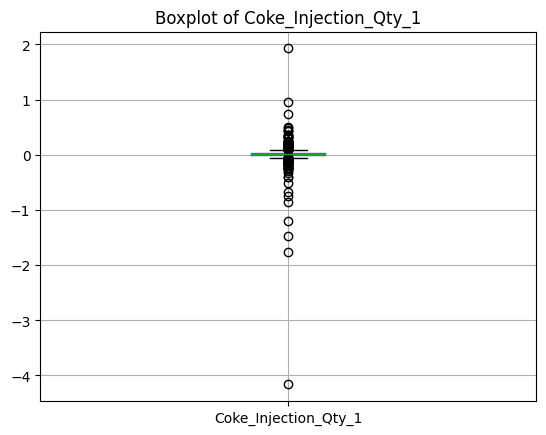

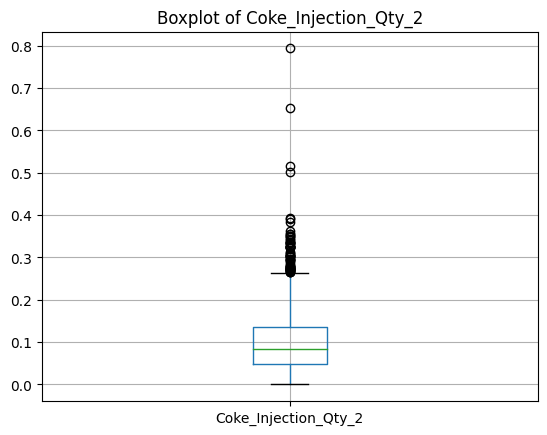

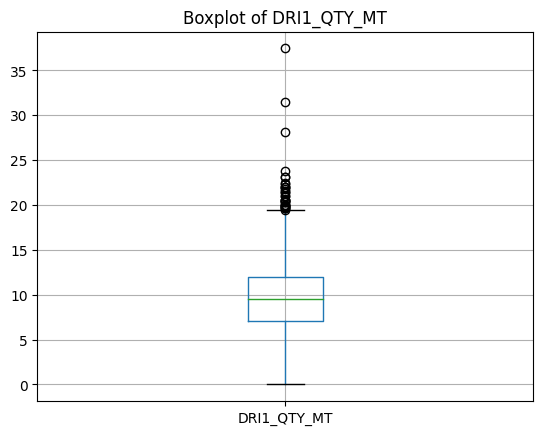

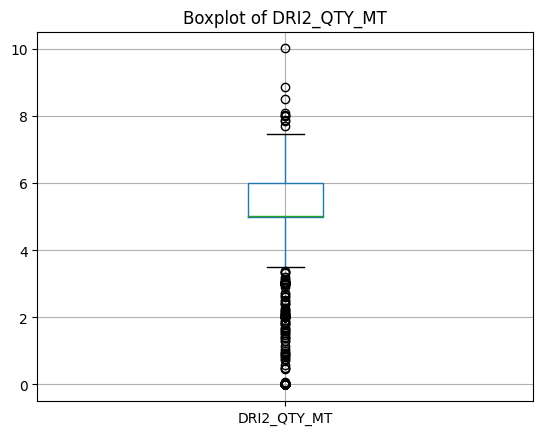

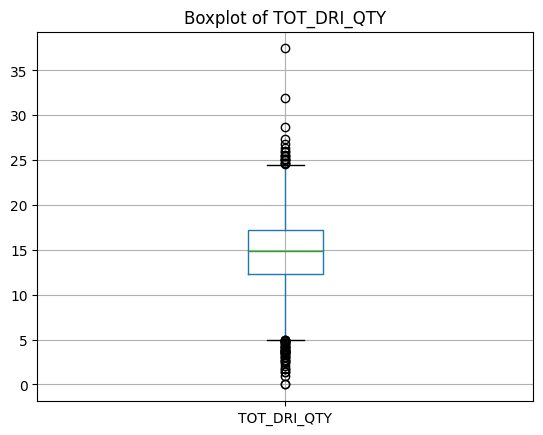

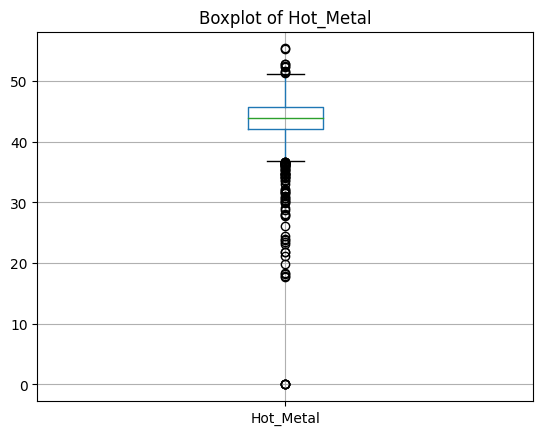

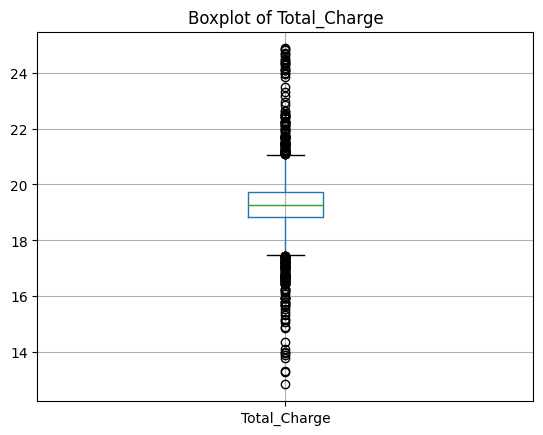

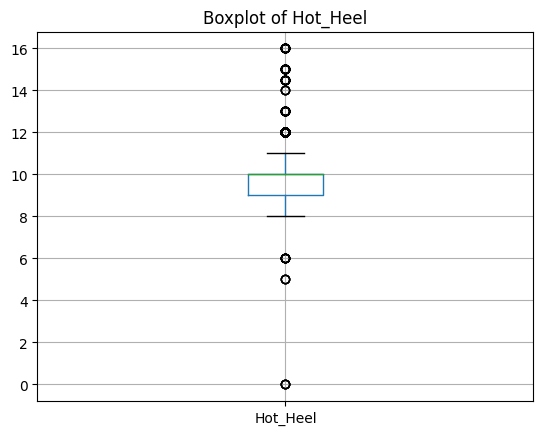

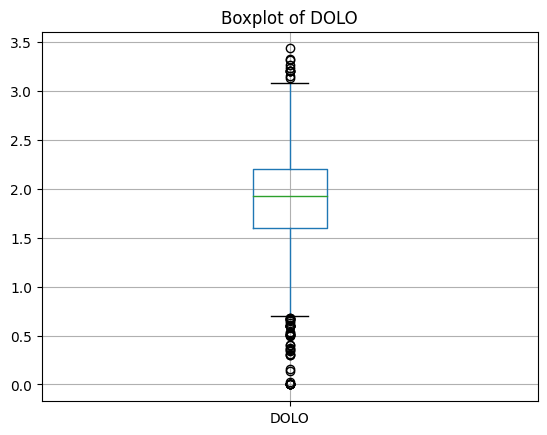

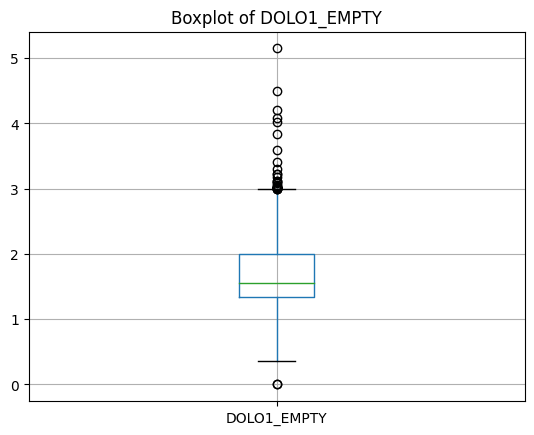

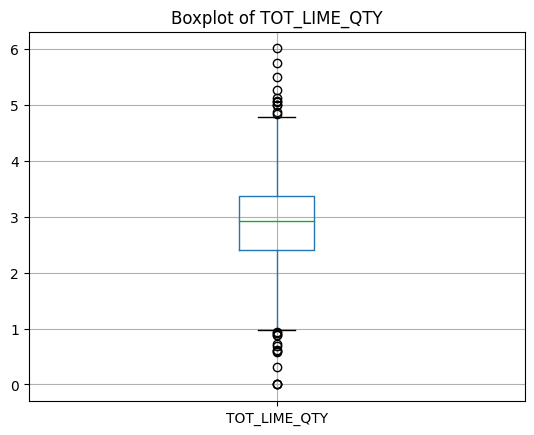

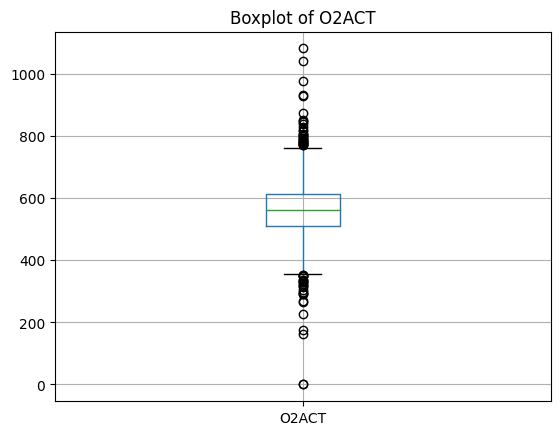

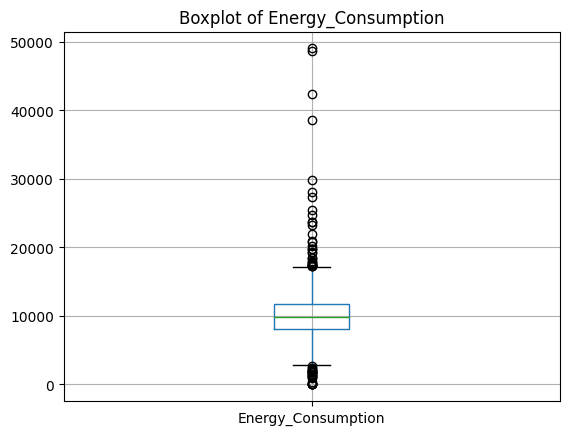

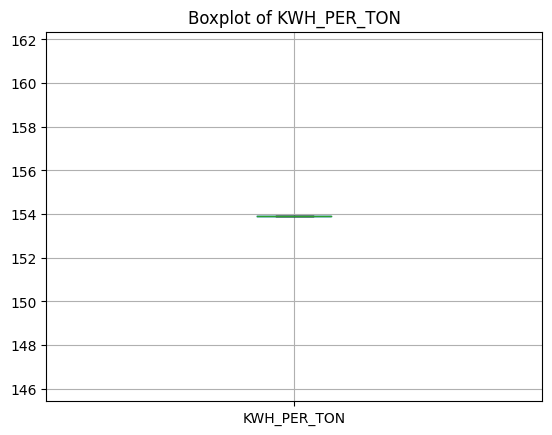

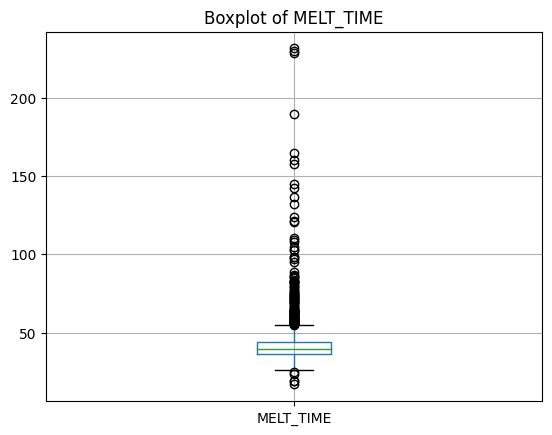

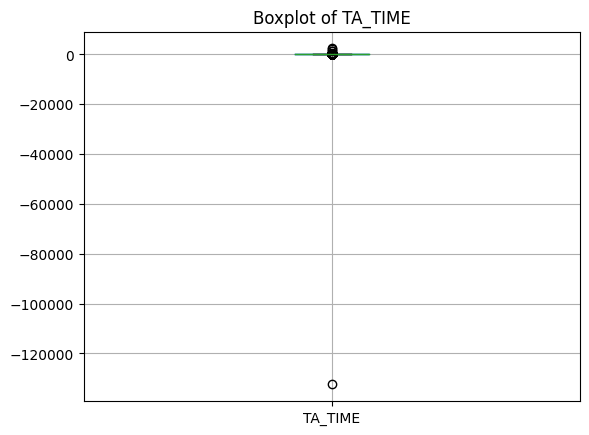

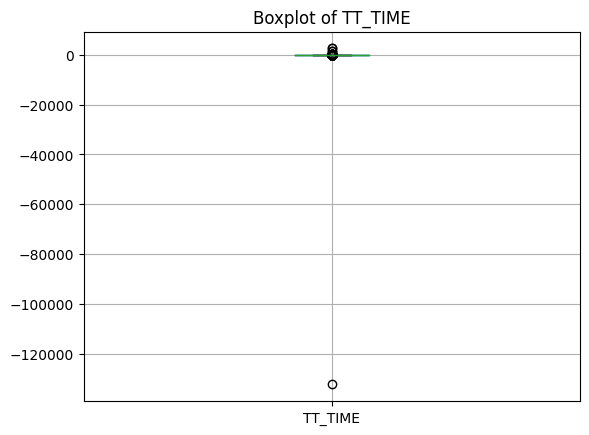

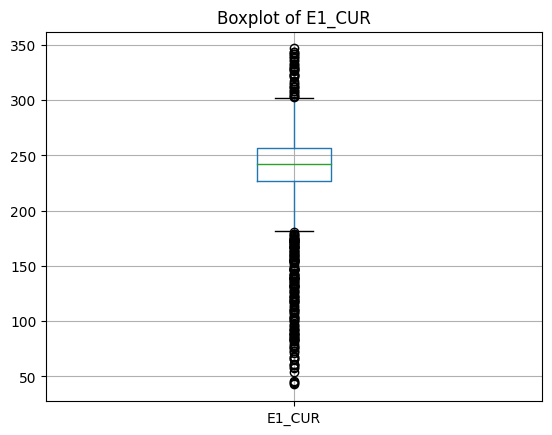

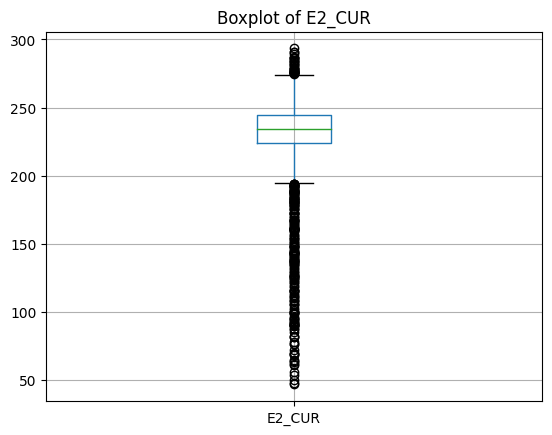

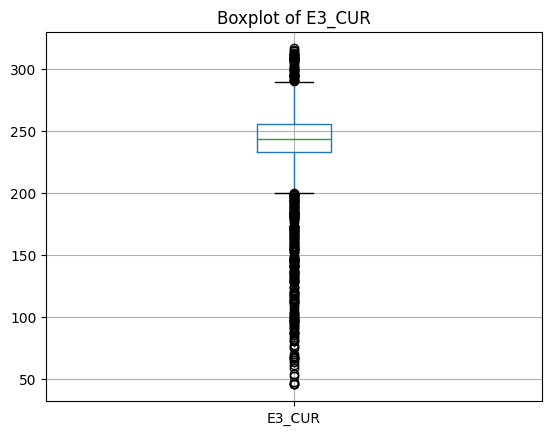

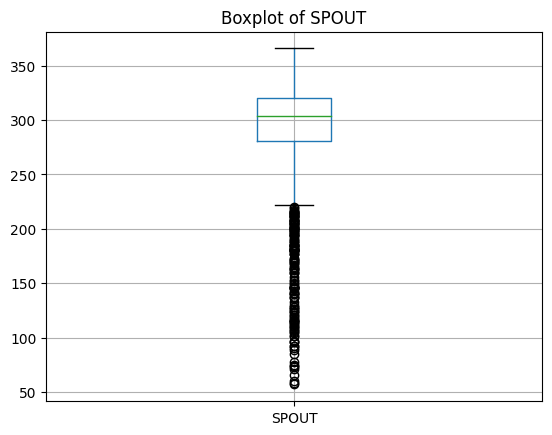

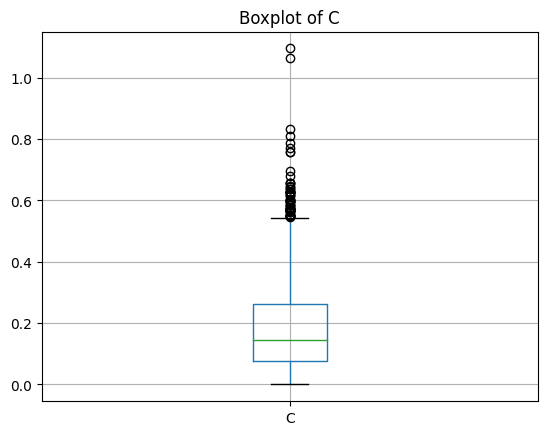

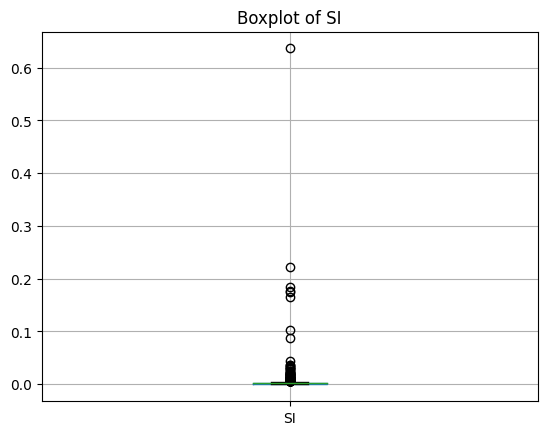

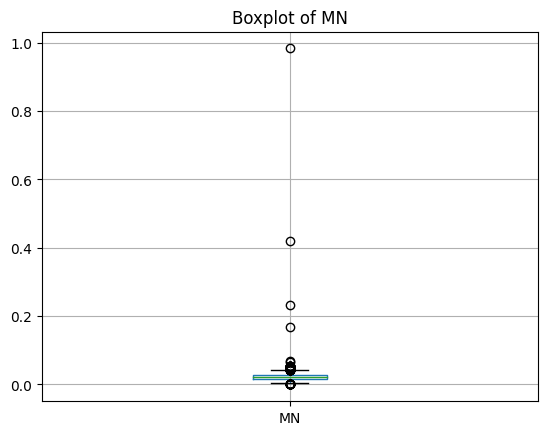

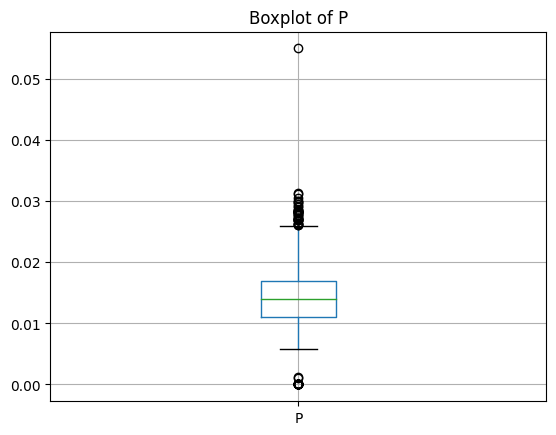

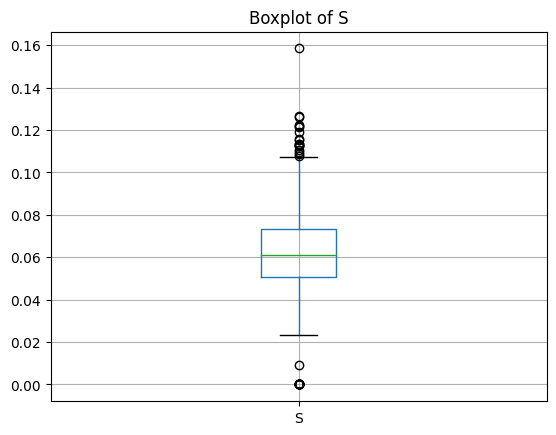

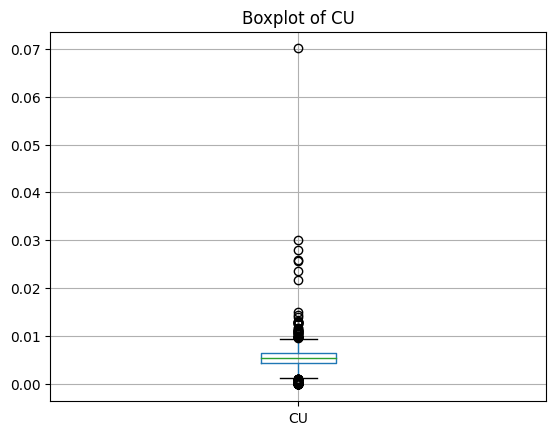

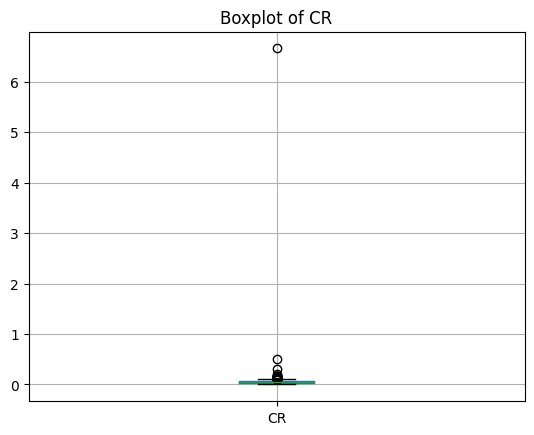

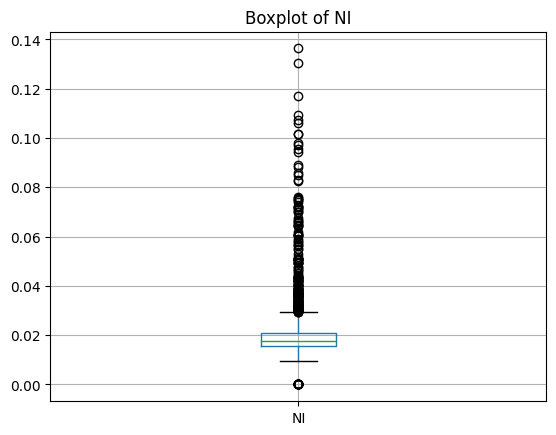

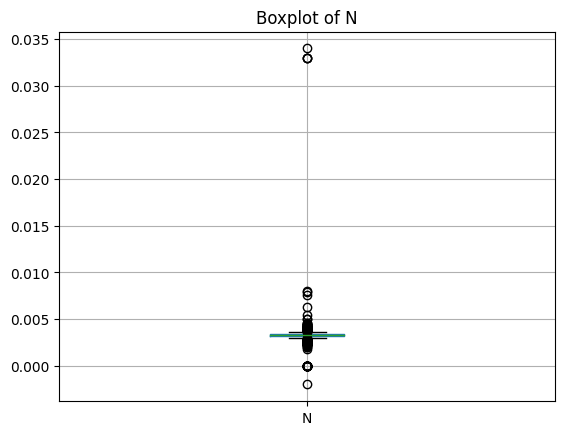

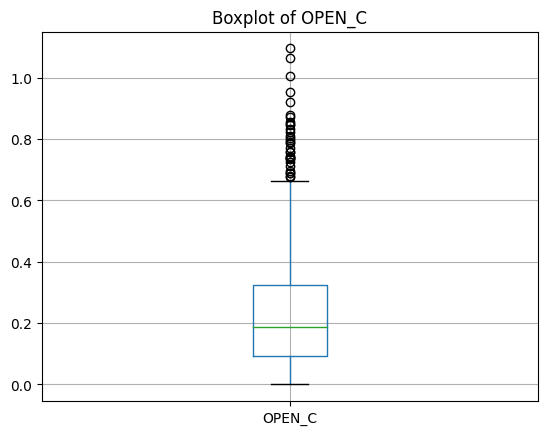

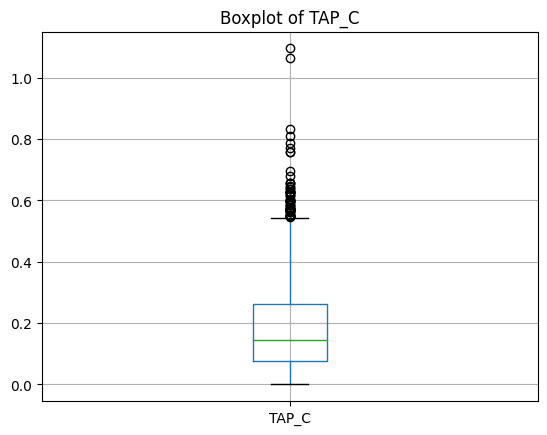

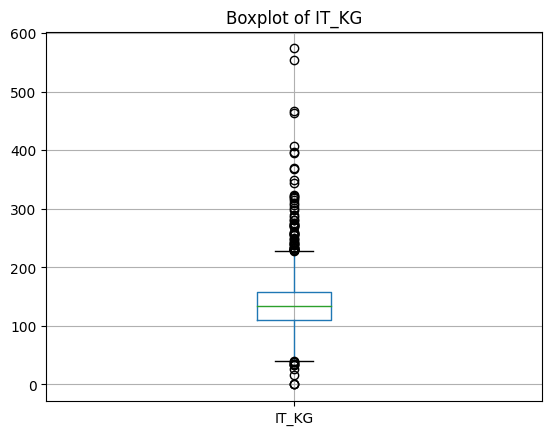

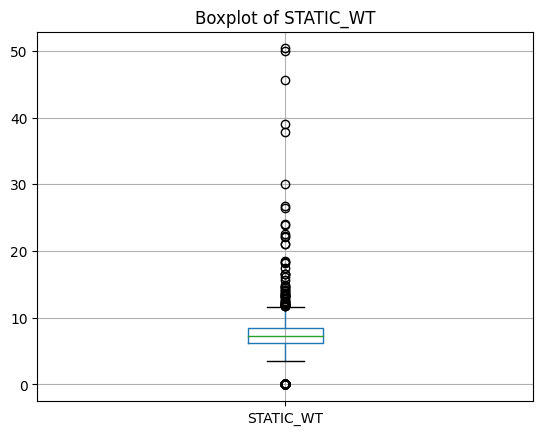

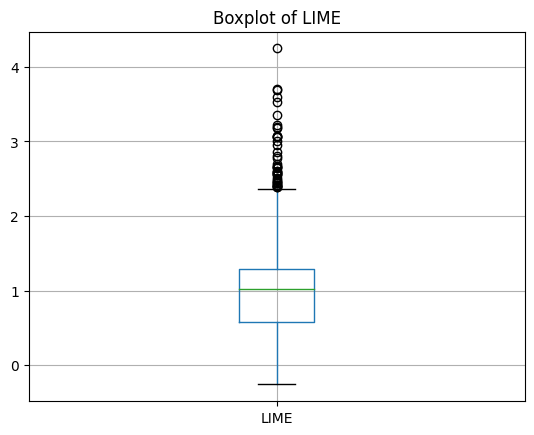

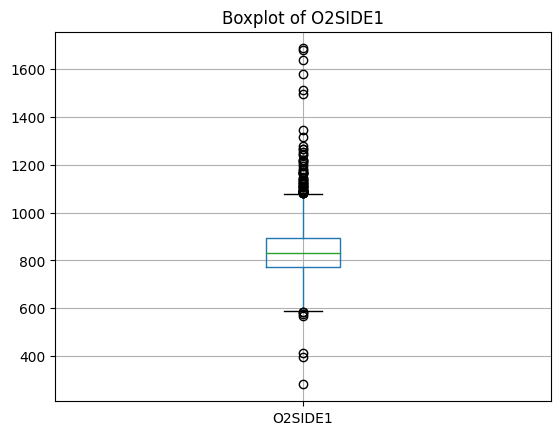

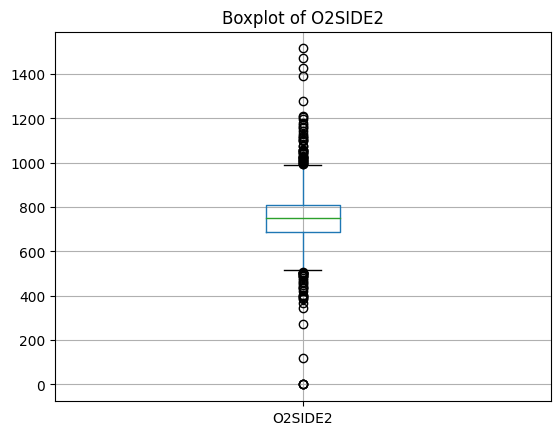

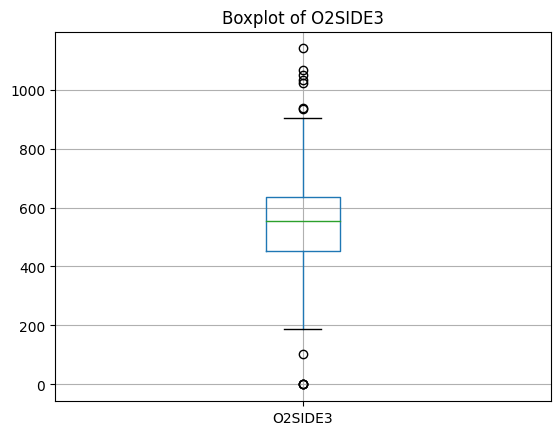

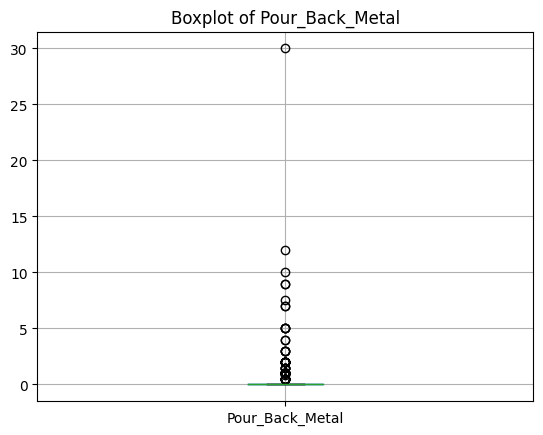

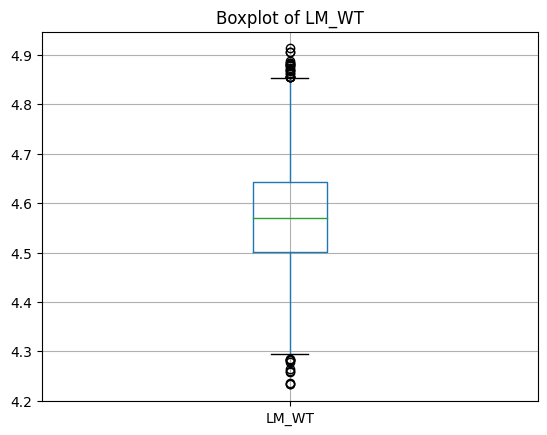

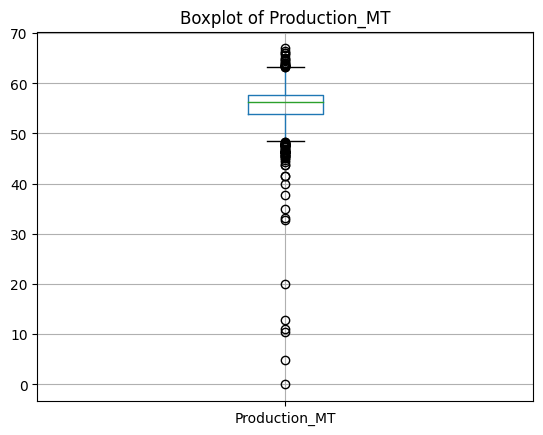

In [41]:
# prompt: find ouliers in each ratio column and plot each of them

import matplotlib.pyplot as plt
import numpy as np
# Calculate z-scores for all ratio columns
z_scores = np.abs((df[ratio_cols] - df[ratio_cols].mean()) / df[ratio_cols].std())

# Define a threshold for outlier detection (e.g., 3 standard deviations)
threshold = 3

# Identify outliers for each column
outliers = (z_scores > threshold).sum()

# Print the number of outliers in each column
print(outliers)

# Plot boxplots for each ratio column to visualize outliers
for col in ratio_cols:
  plt.figure()  # Create a new figure for each plot
  df.boxplot(column=[col])
  plt.title(f'Boxplot of {col}')
  plt.show()


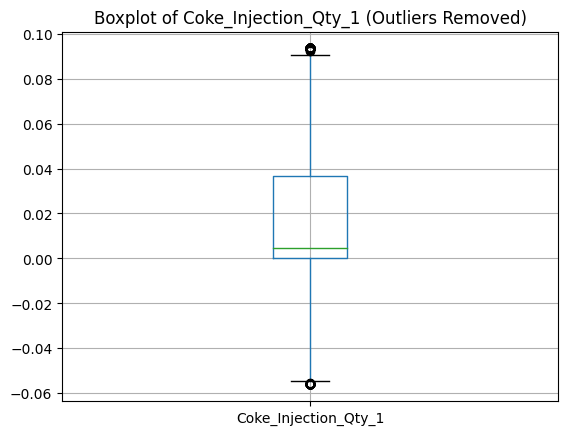

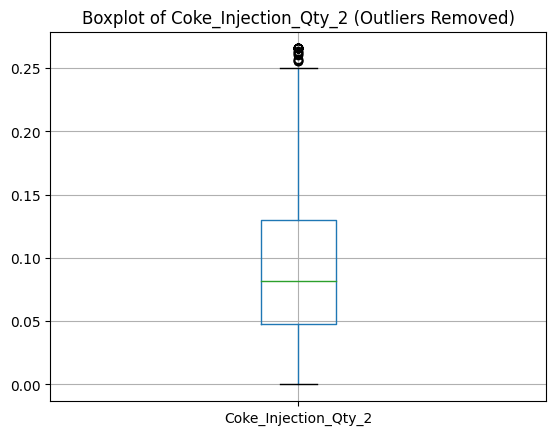

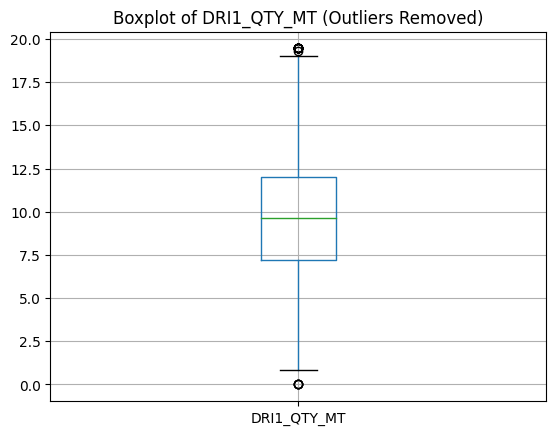

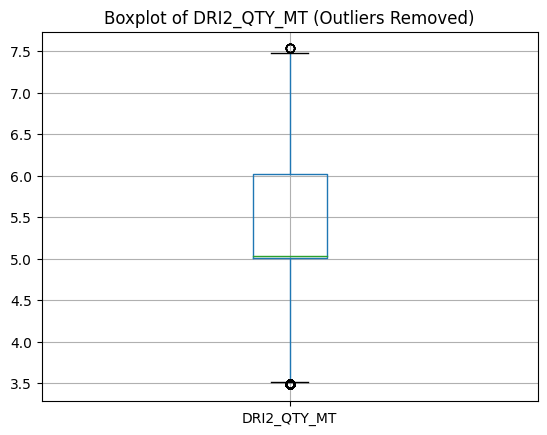

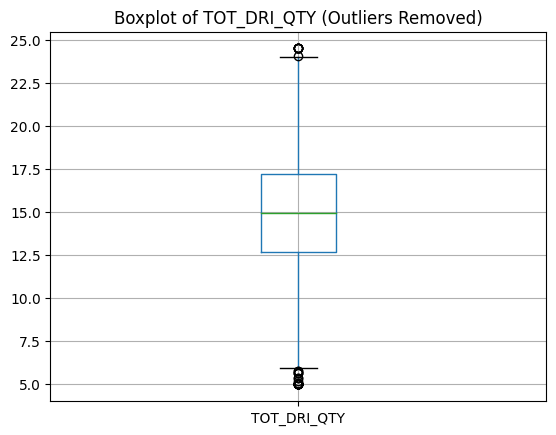

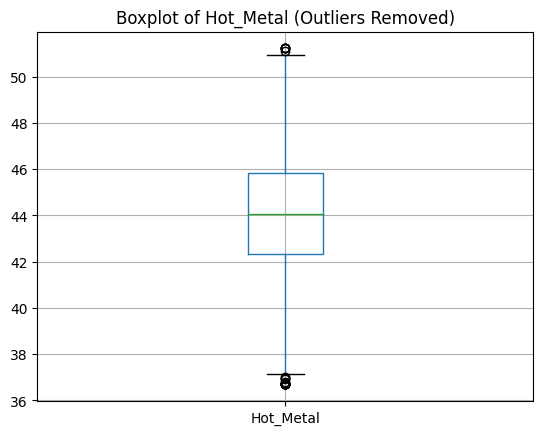

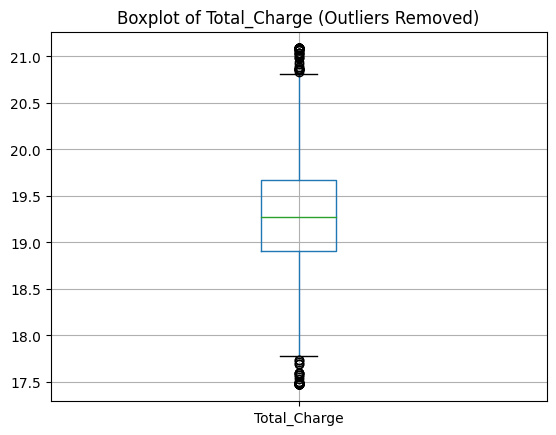

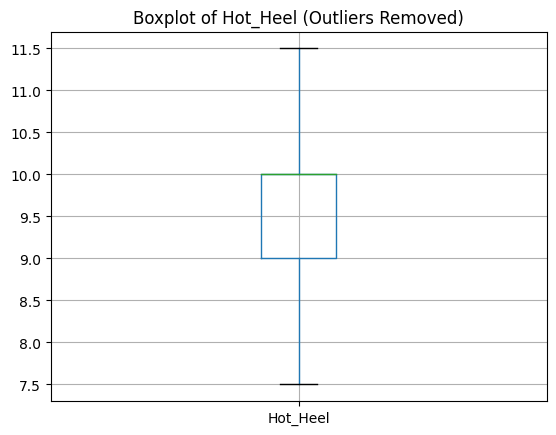

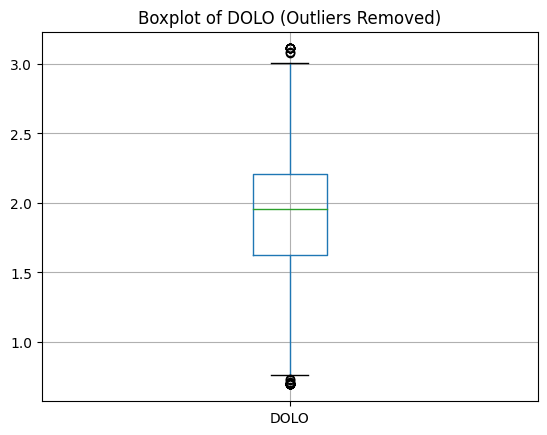

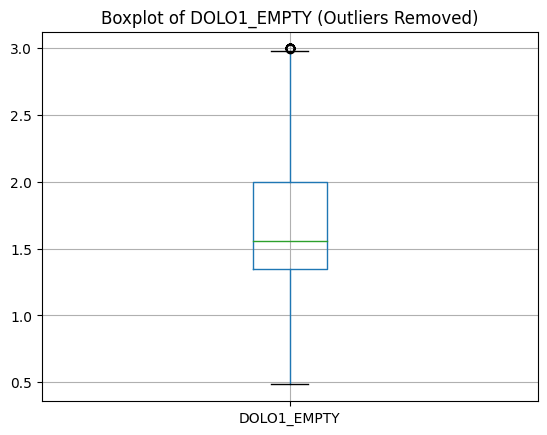

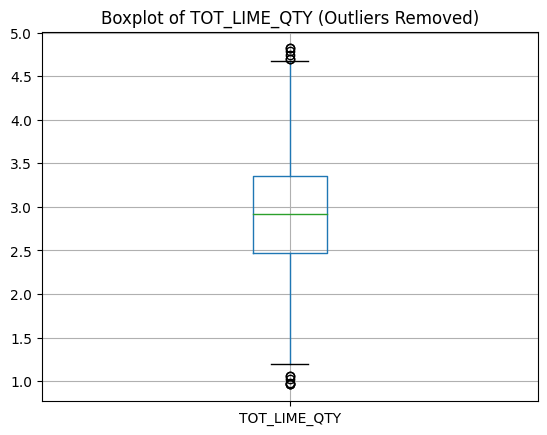

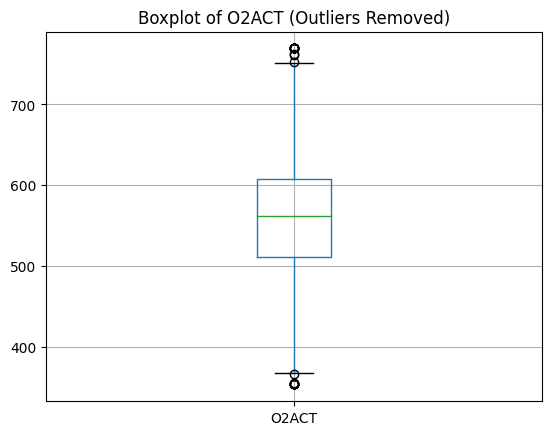

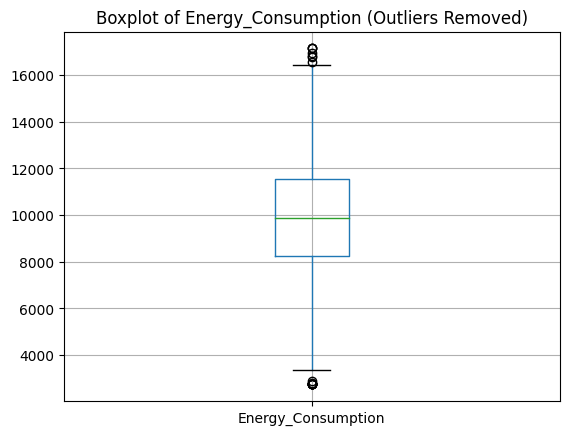

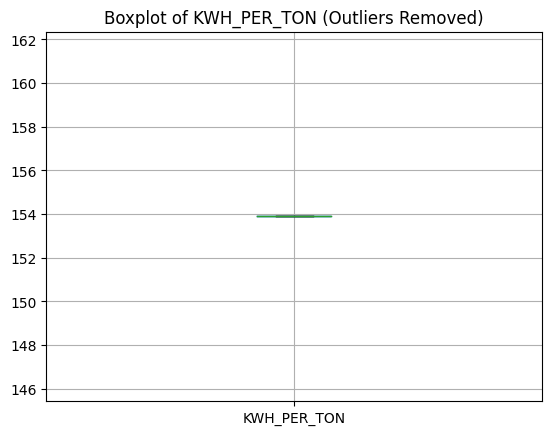

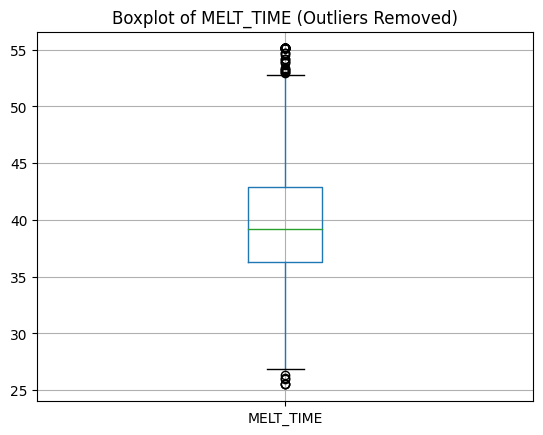

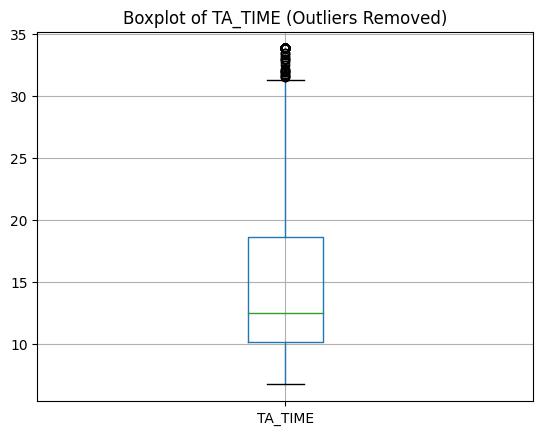

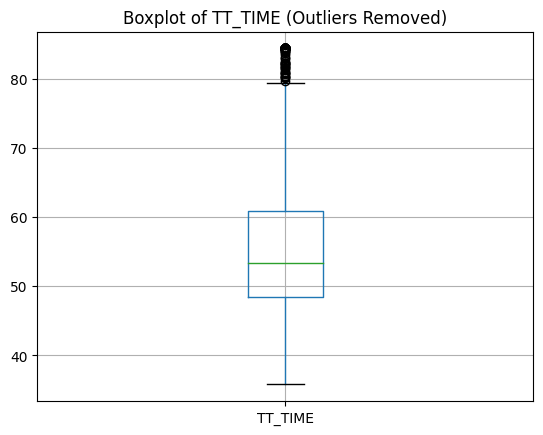

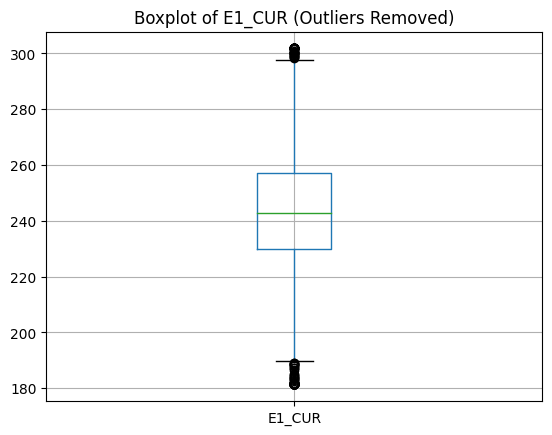

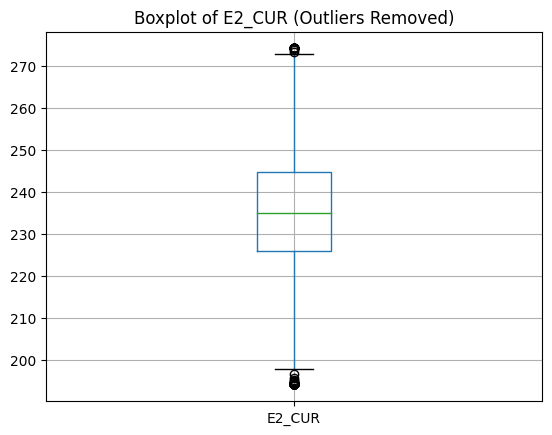

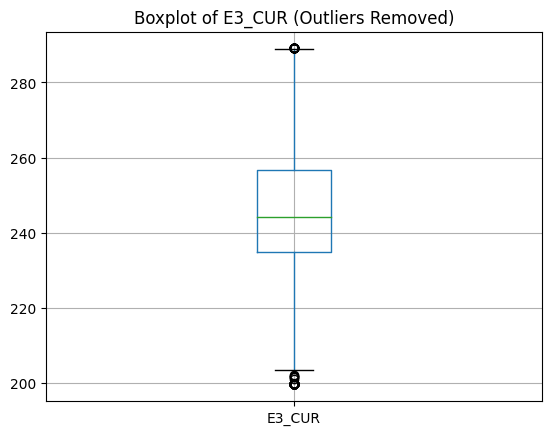

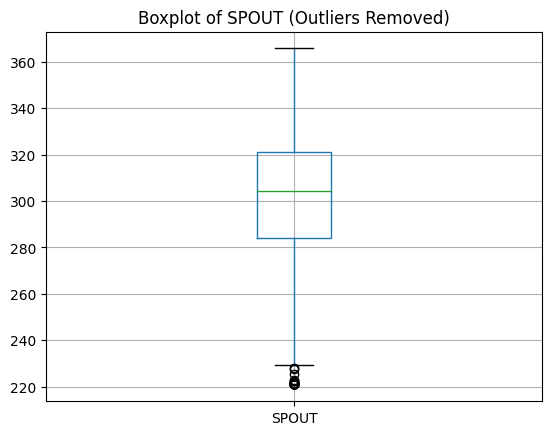

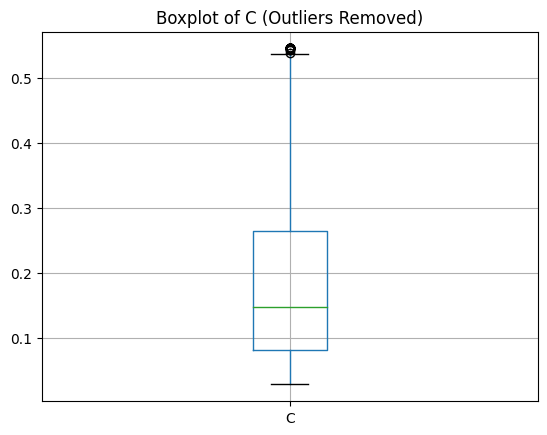

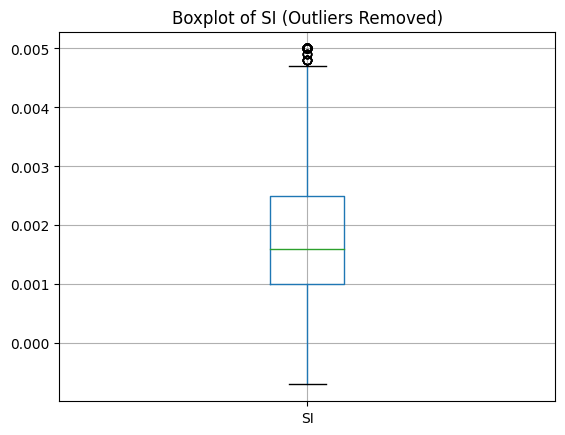

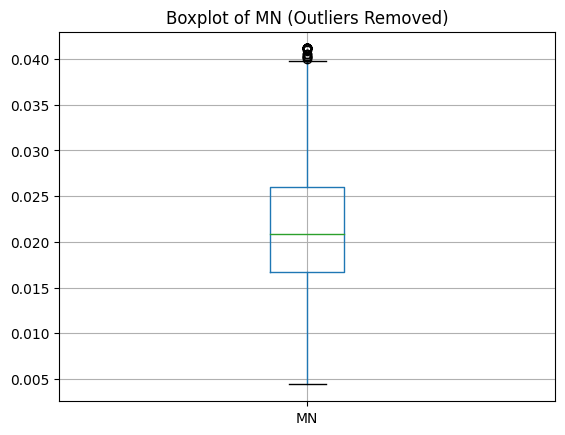

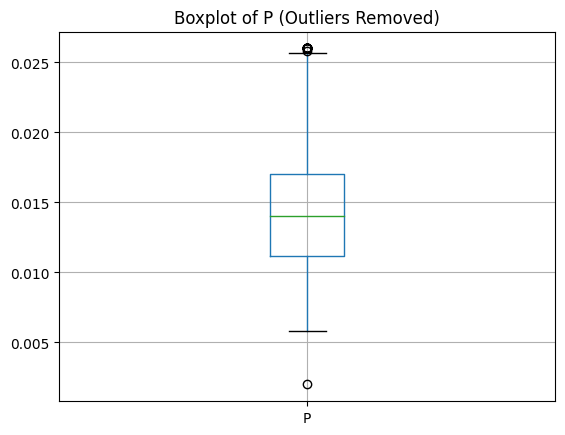

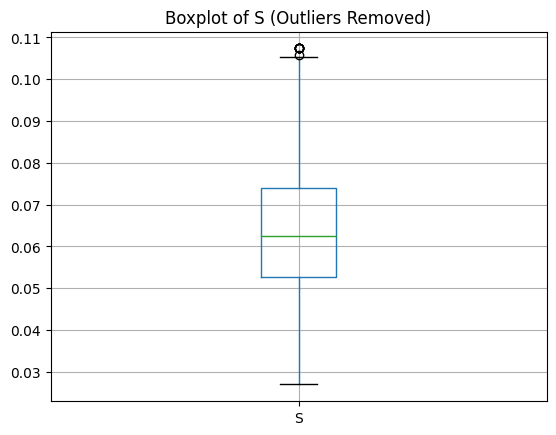

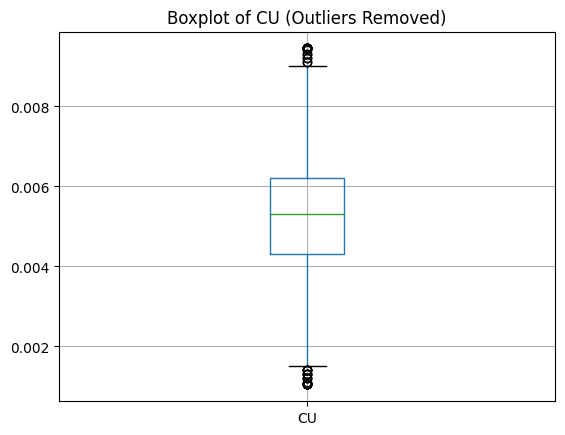

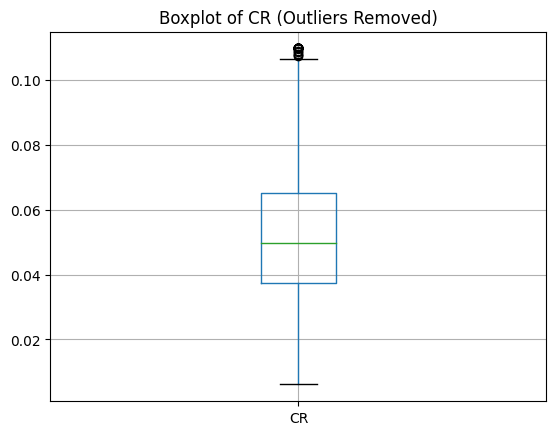

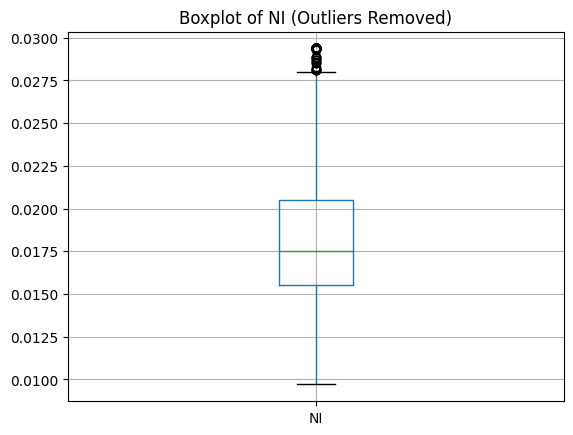

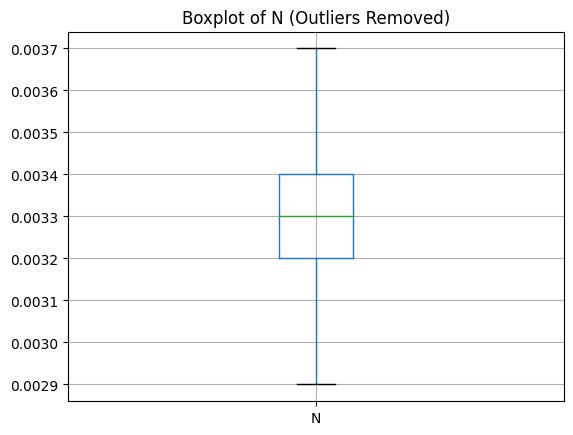

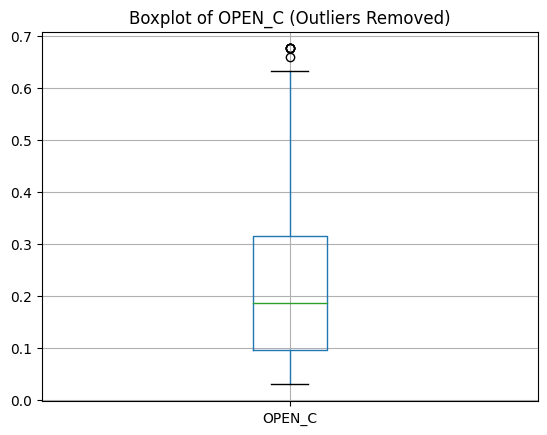

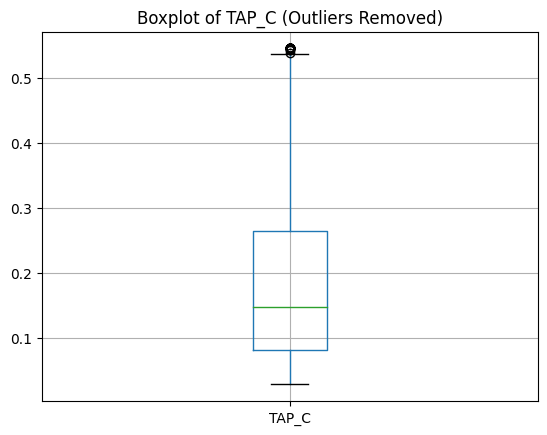

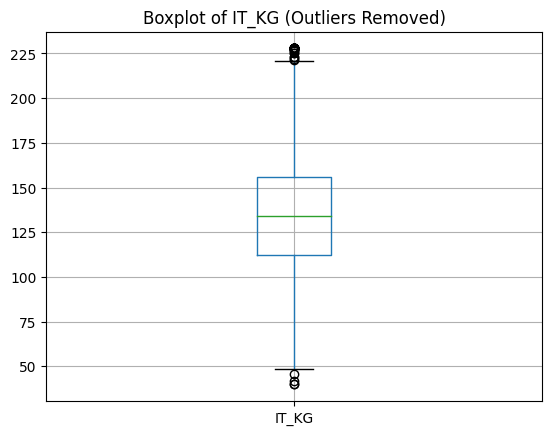

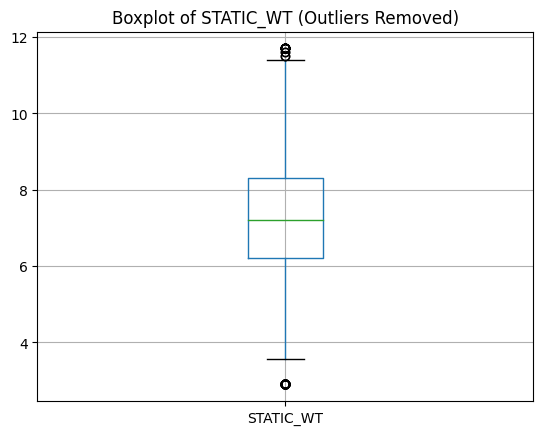

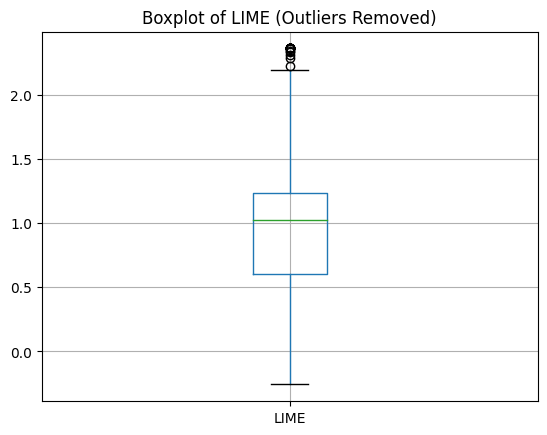

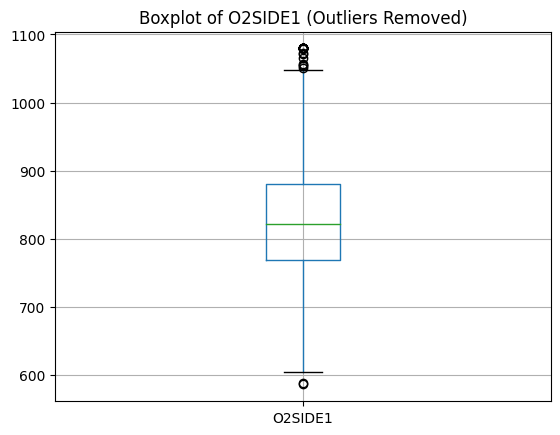

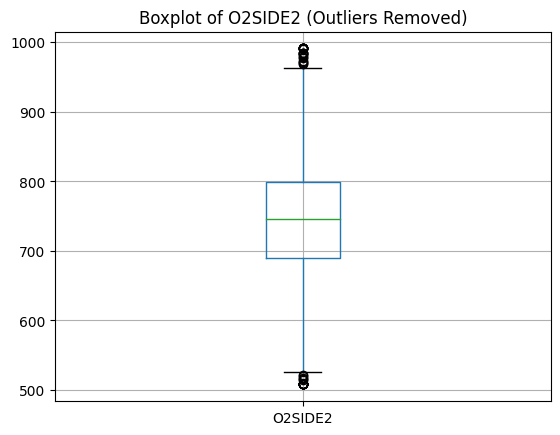

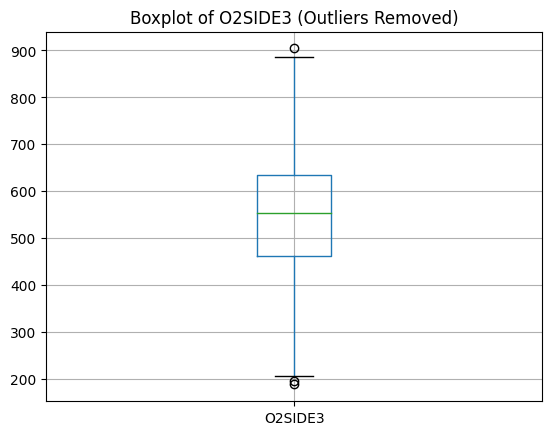

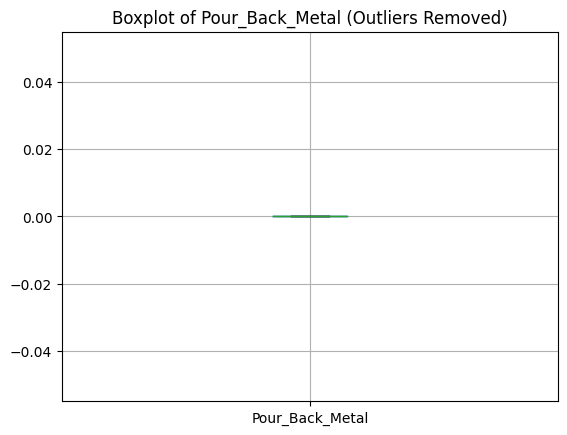

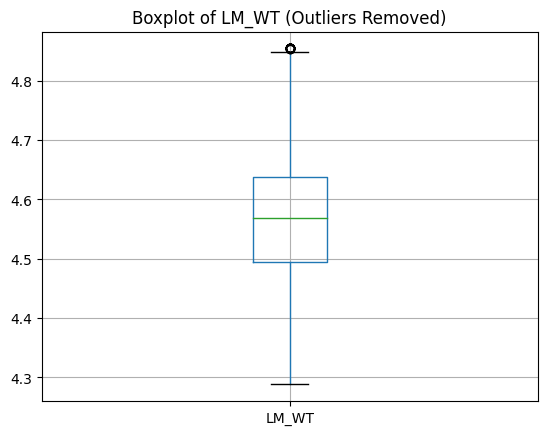

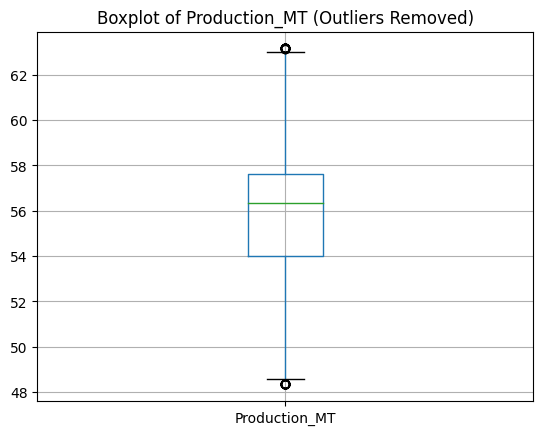

In [43]:
# prompt: remove outliers and plot

import matplotlib.pyplot as plt
# Remove outliers using the z-score threshold
df_no_outliers = df[(z_scores < threshold).all(axis=1)]

# Plot boxplots for each ratio column after removing outliers
for col in ratio_cols:
  plt.figure()
  df_no_outliers.boxplot(column=[col])
  plt.title(f'Boxplot of {col} (Outliers Removed)')
  plt.show()


Coke_Injection_Qty_1    0
Coke_Injection_Qty_2    0
DRI1_QTY_MT             0
DRI2_QTY_MT             0
TOT_DRI_QTY             0
Hot_Metal               0
Total_Charge            0
Hot_Heel                0
DOLO                    0
DOLO1_EMPTY             0
TOT_LIME_QTY            0
O2ACT                   0
Energy_Consumption      0
KWH_PER_TON             0
MELT_TIME               0
TA_TIME                 0
TT_TIME                 0
E1_CUR                  0
E2_CUR                  0
E3_CUR                  0
SPOUT                   0
C                       0
SI                      0
MN                      0
P                       0
S                       0
CU                      0
CR                      0
NI                      0
N                       0
OPEN_C                  0
TAP_C                   0
IT_KG                   0
STATIC_WT               0
LIME                    0
O2SIDE1                 0
O2SIDE2                 0
O2SIDE3                 0
Pour_Back_Me

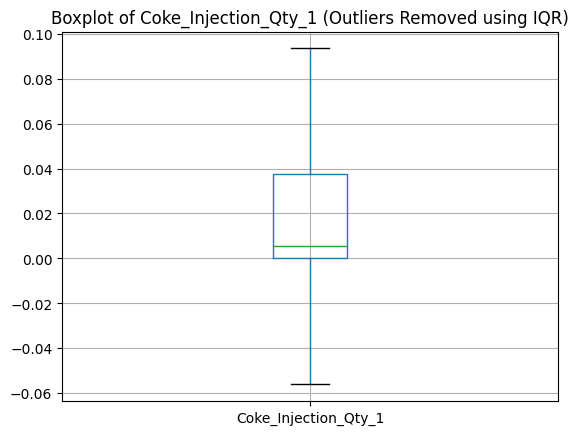

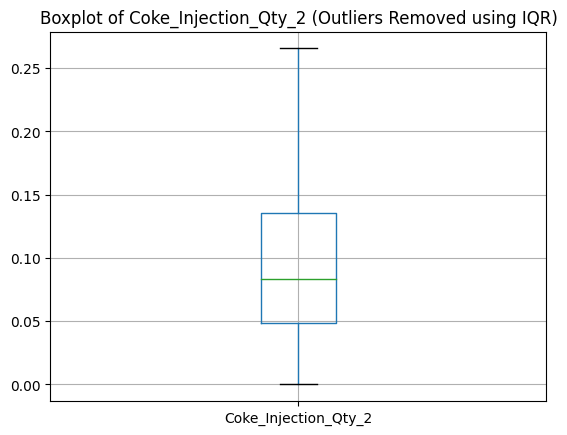

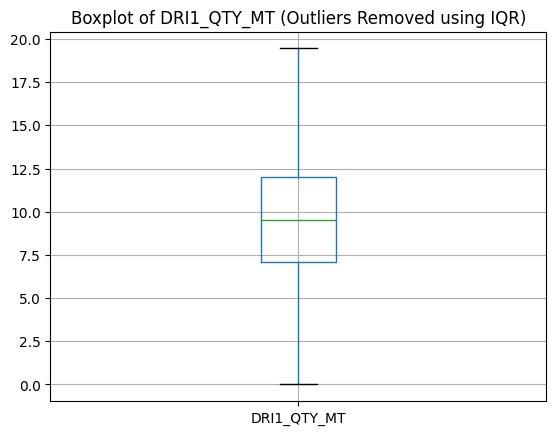

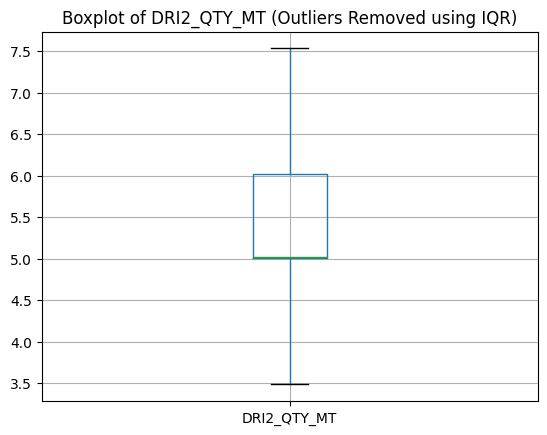

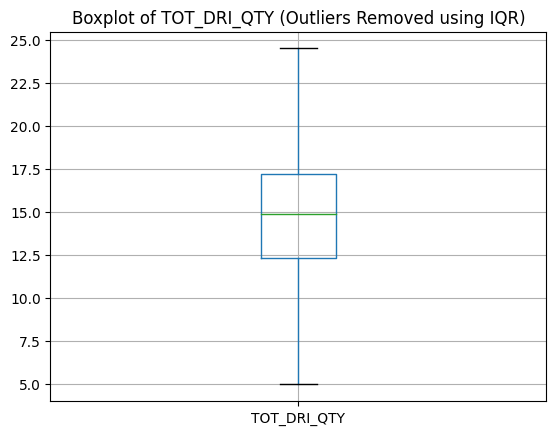

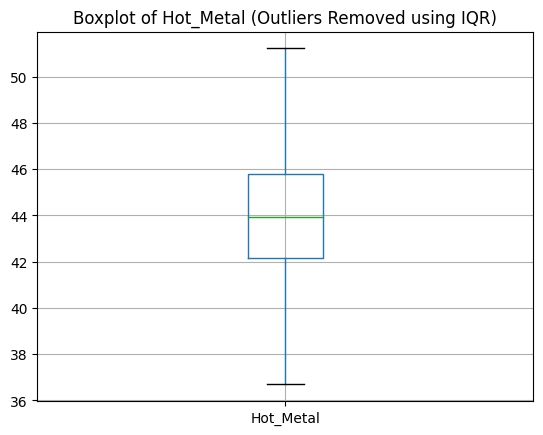

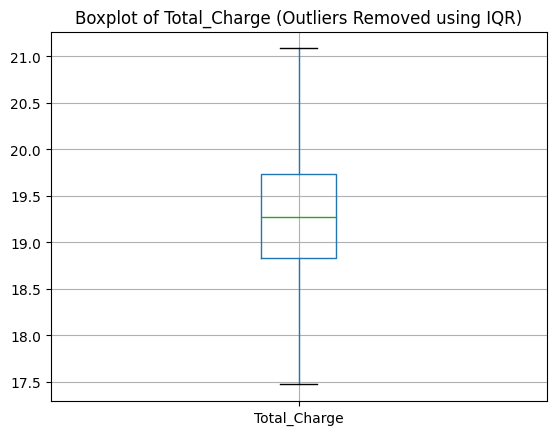

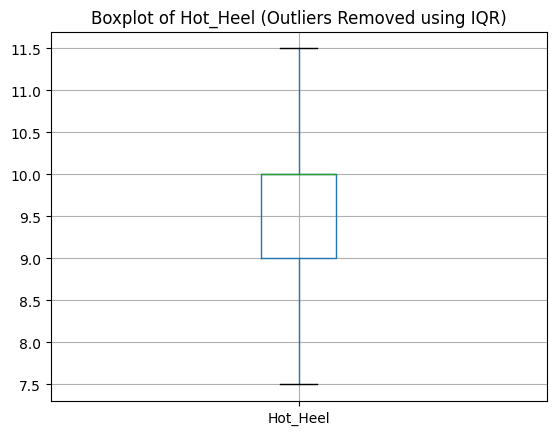

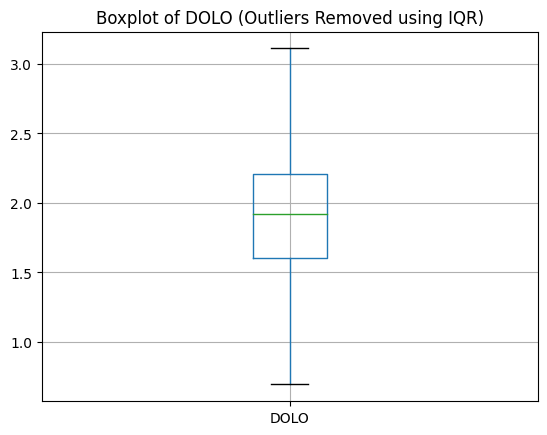

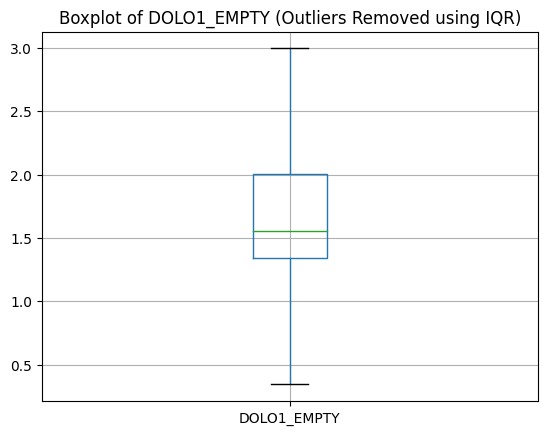

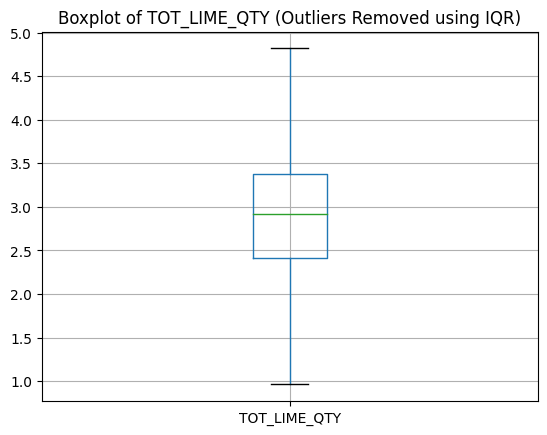

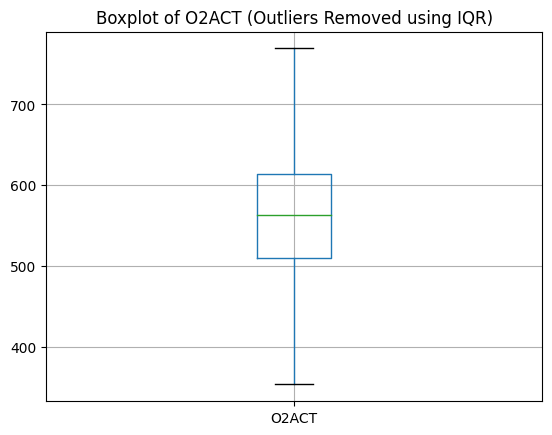

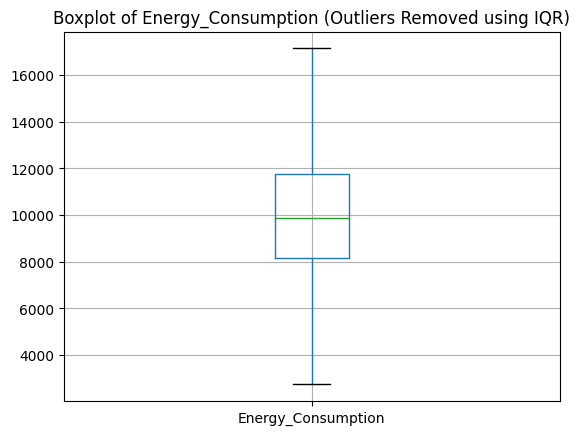

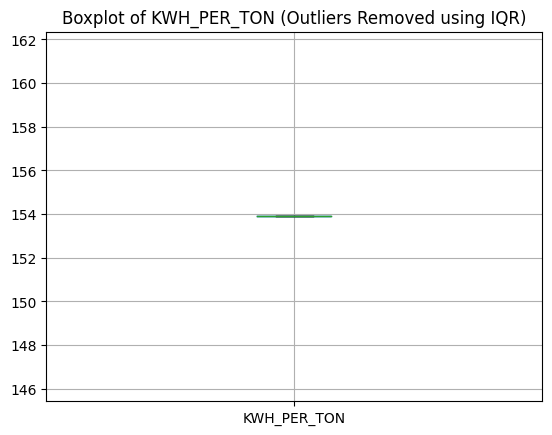

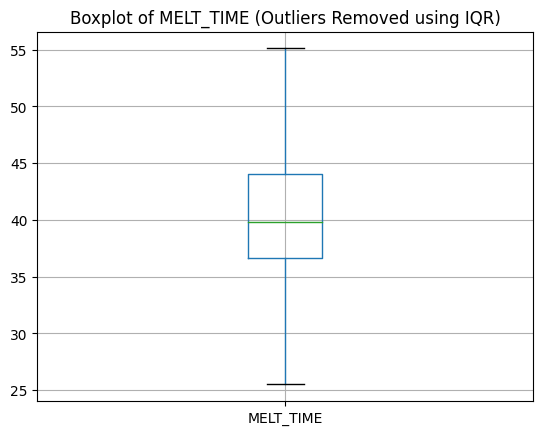

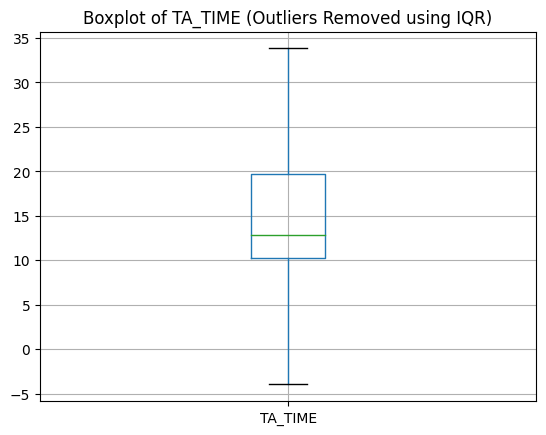

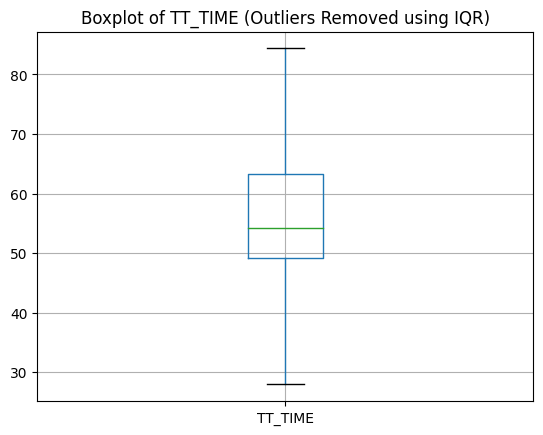

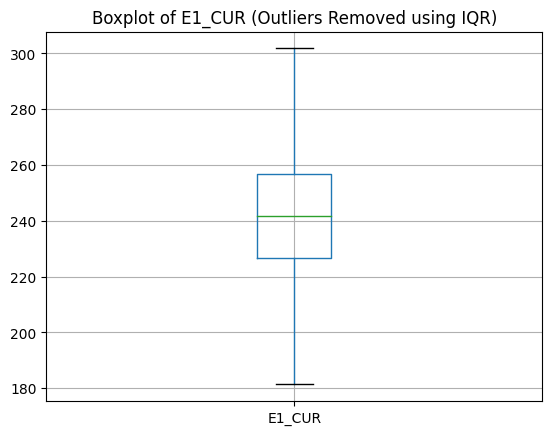

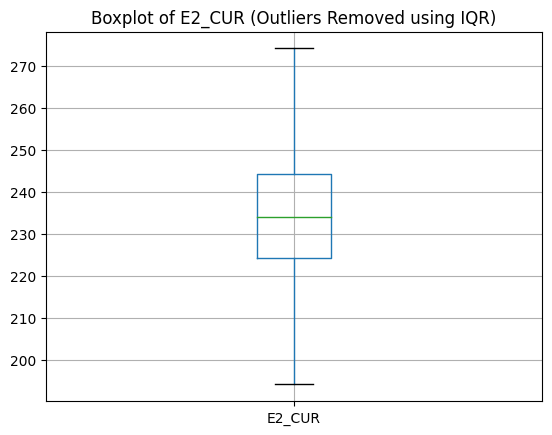

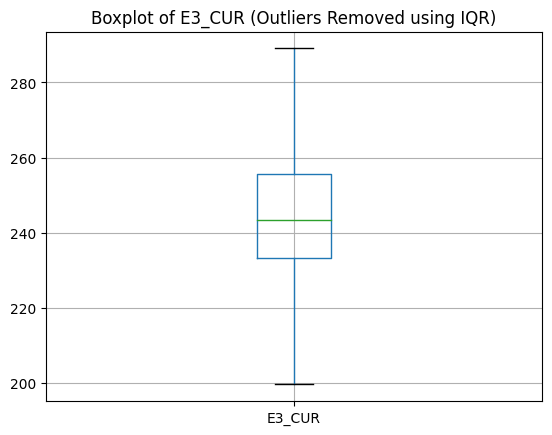

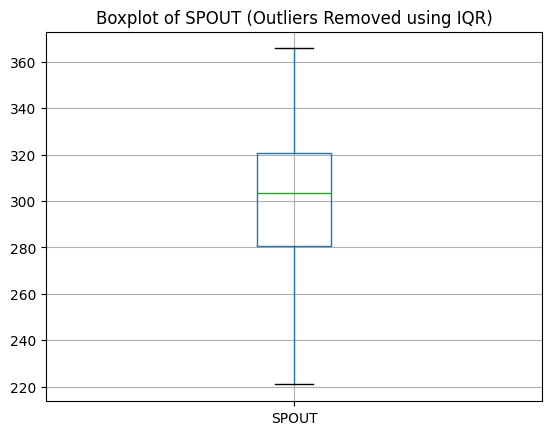

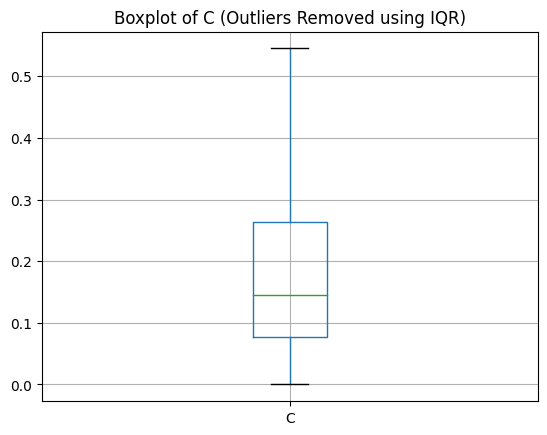

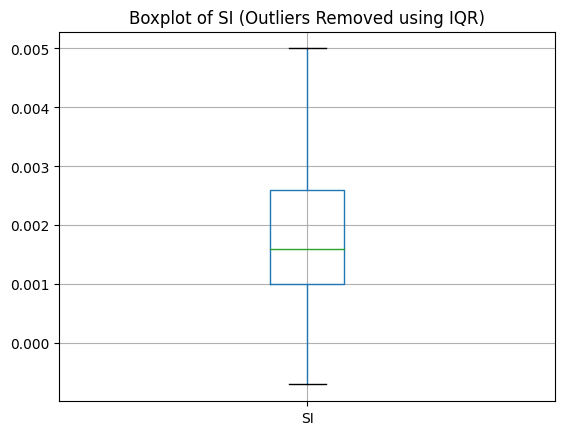

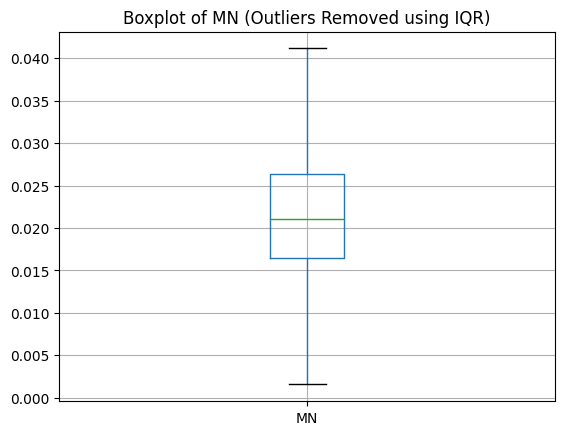

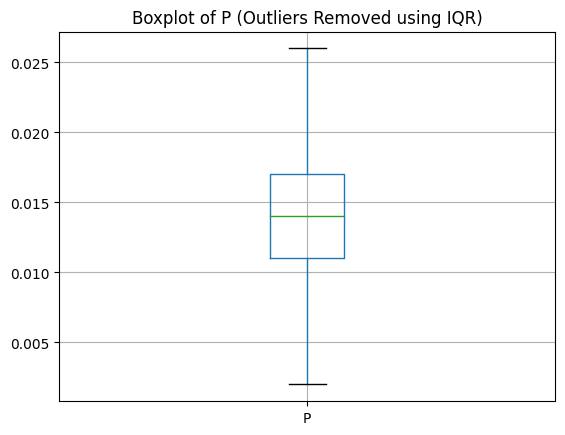

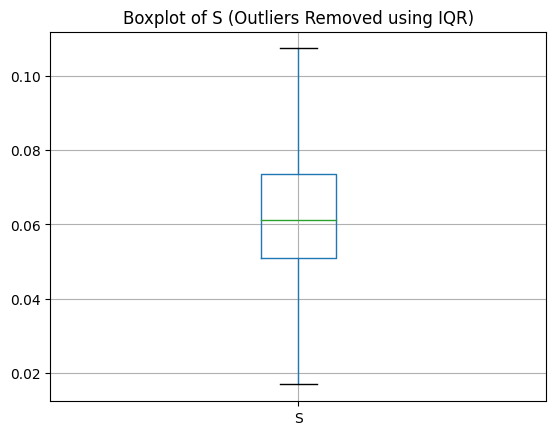

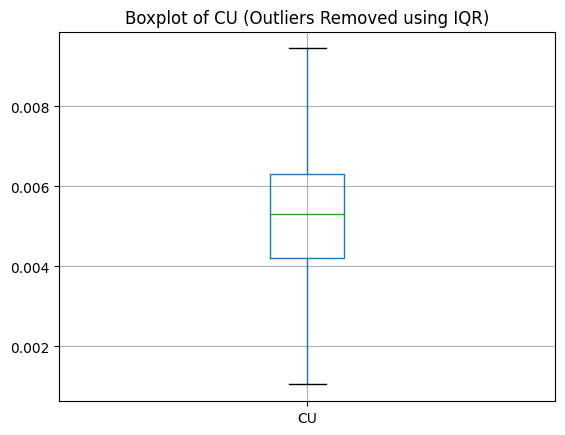

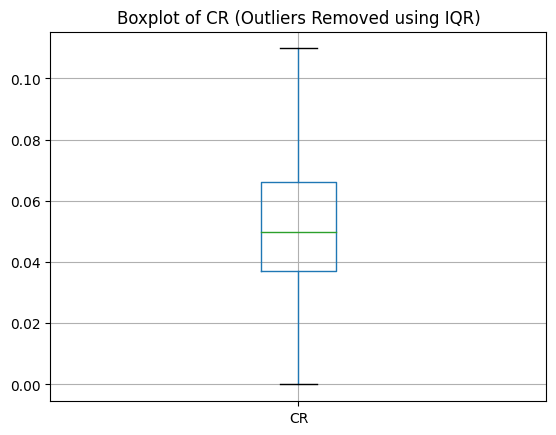

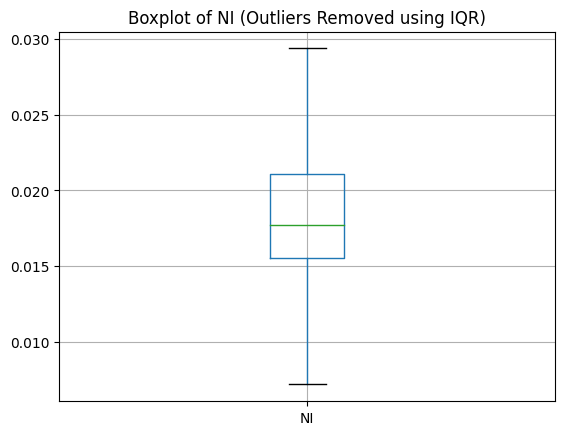

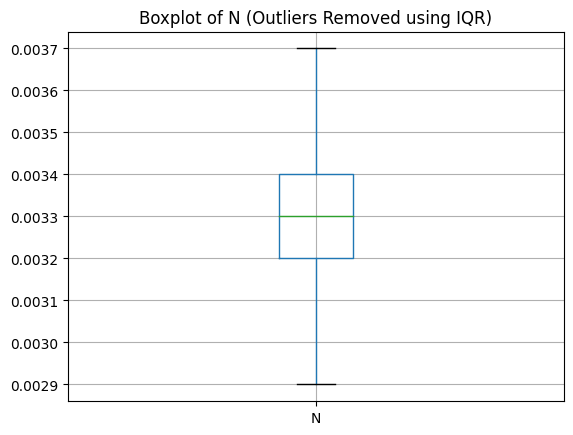

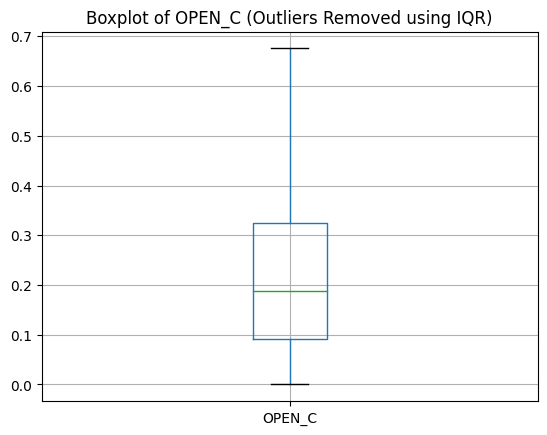

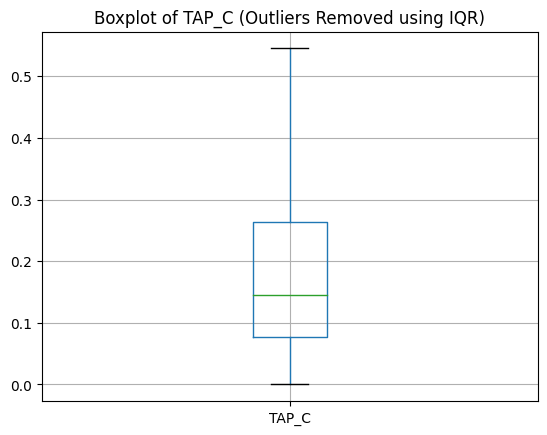

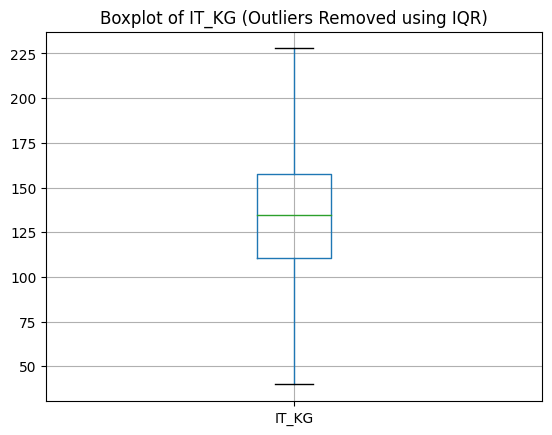

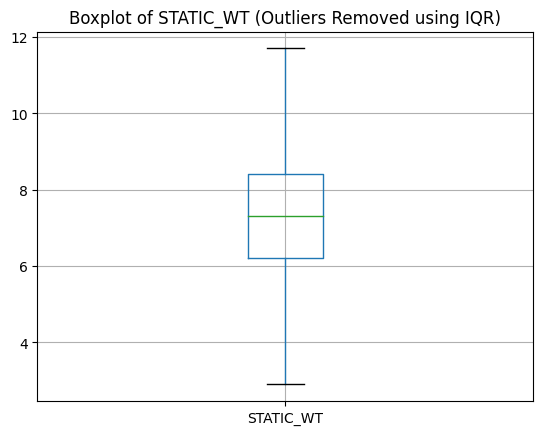

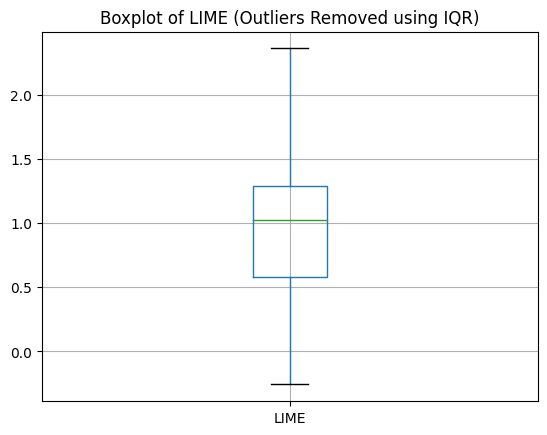

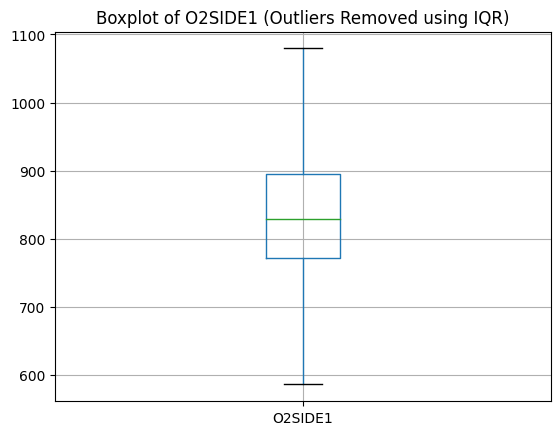

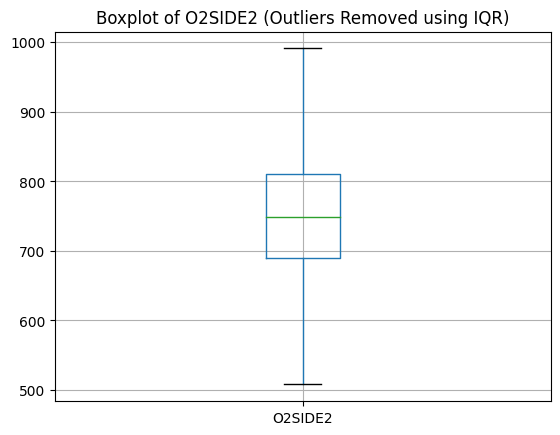

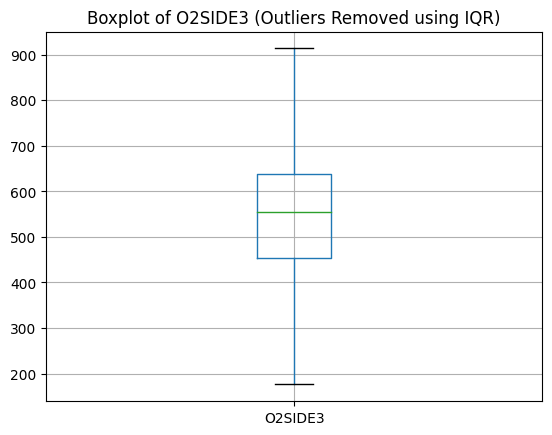

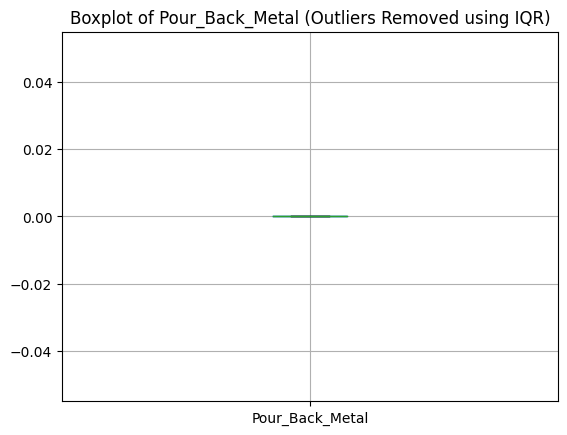

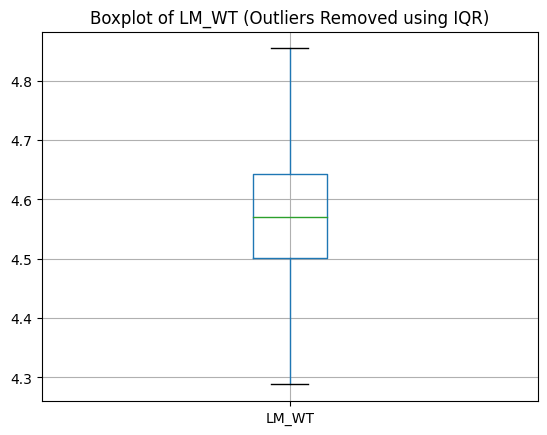

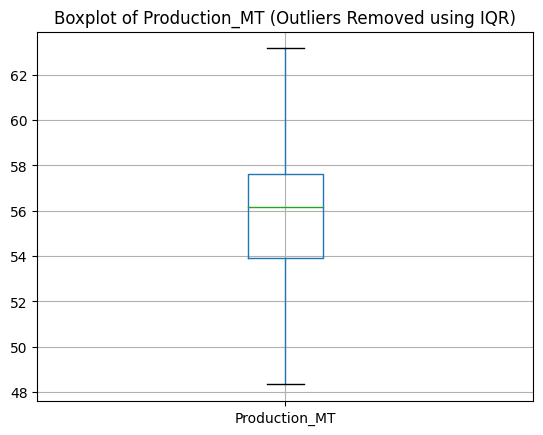

In [44]:
# prompt: now use iqr techinique

import matplotlib.pyplot as plt
# Calculate IQR for all ratio columns
Q1 = df[ratio_cols].quantile(0.25)
Q3 = df[ratio_cols].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers for each column
outliers_iqr = ((df[ratio_cols] < lower_bound) | (df[ratio_cols] > upper_bound)).sum()

# Print the number of outliers in each column
print(outliers_iqr)

# Remove outliers using IQR
df_no_outliers_iqr = df[~((df[ratio_cols] < lower_bound) | (df[ratio_cols] > upper_bound)).any(axis=1)]

# Plot boxplots for each ratio column after removing outliers using IQR
for col in ratio_cols:
  plt.figure()
  df_no_outliers_iqr.boxplot(column=[col])
  plt.title(f'Boxplot of {col} (Outliers Removed using IQR)')
  plt.show()


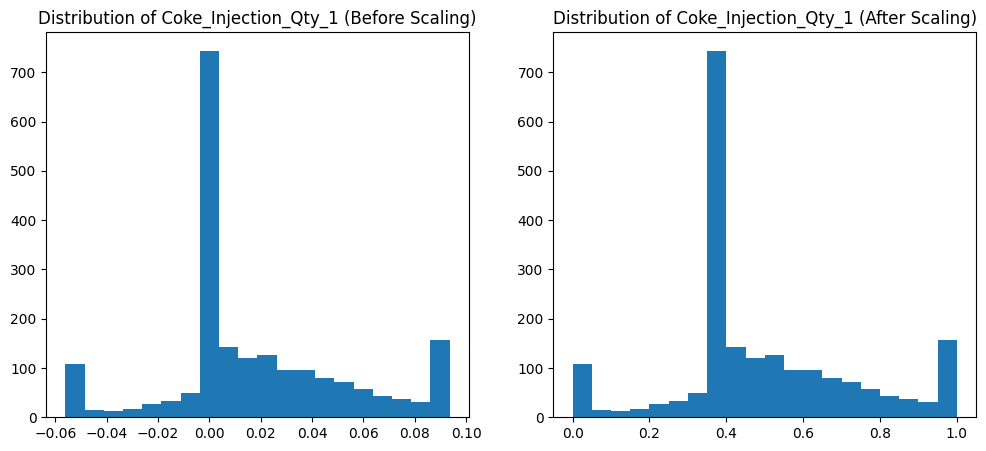

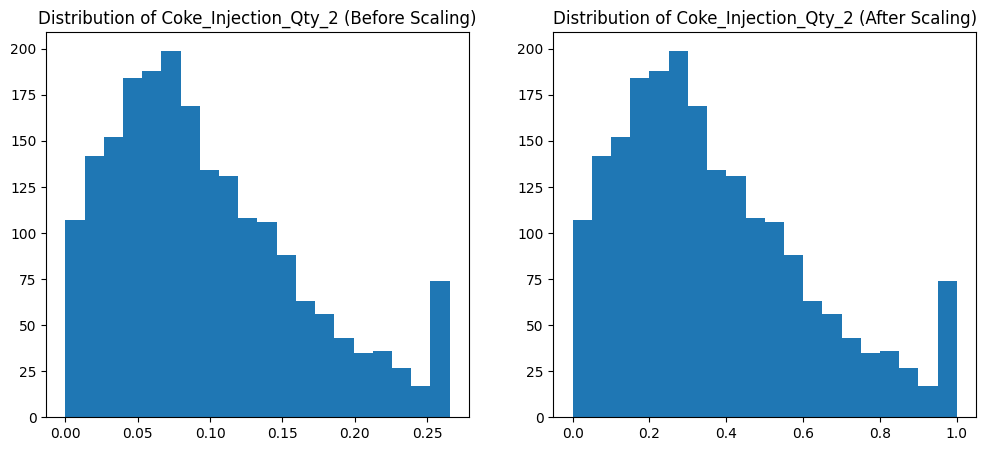

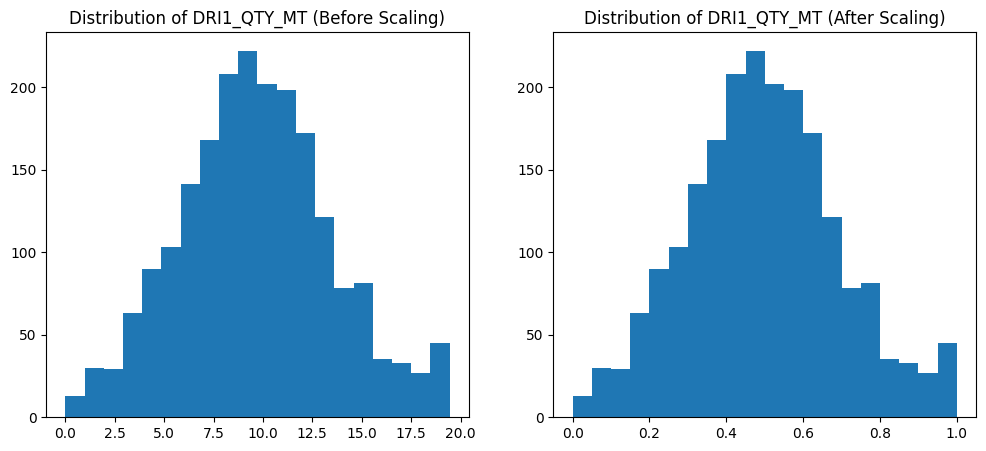

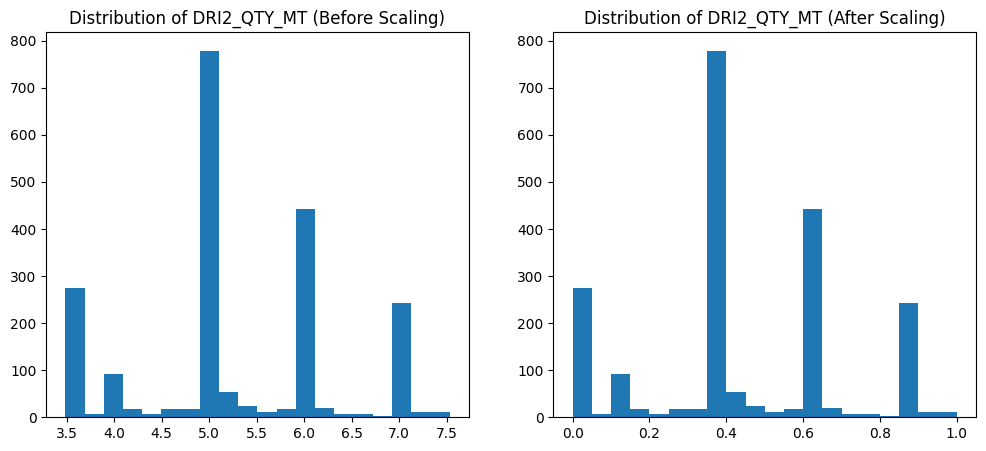

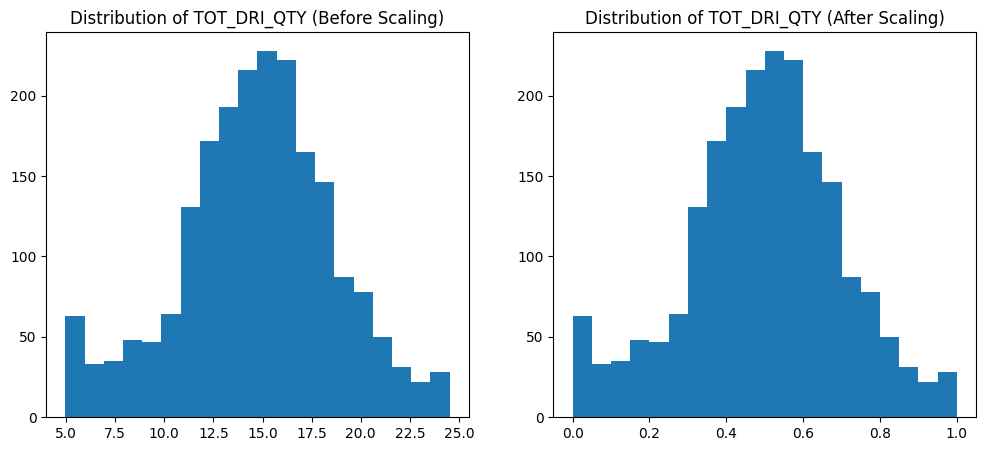

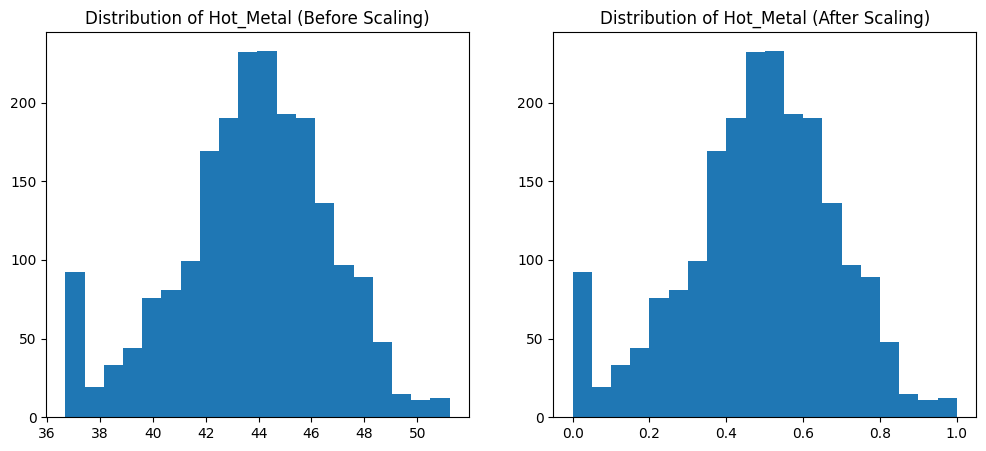

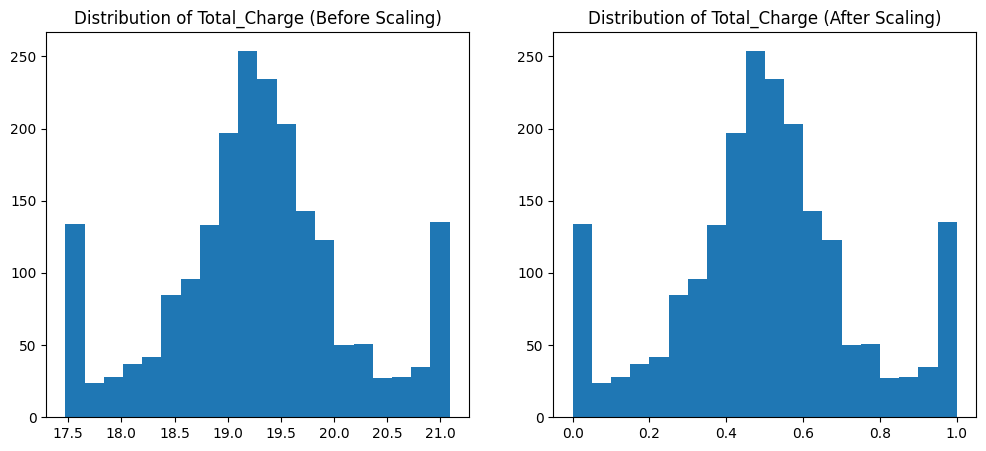

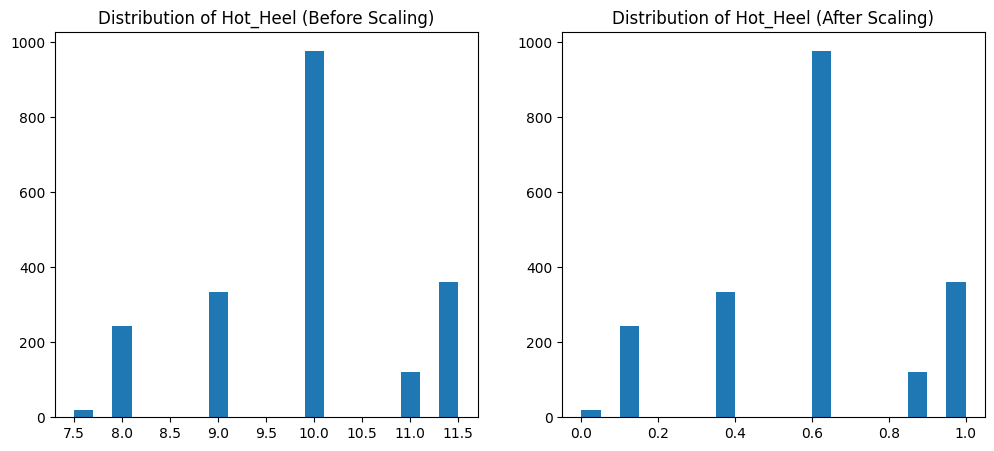

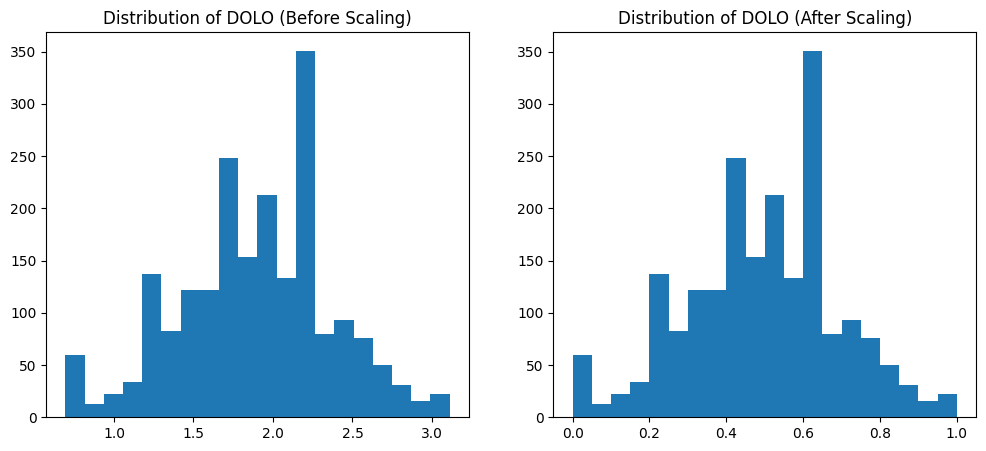

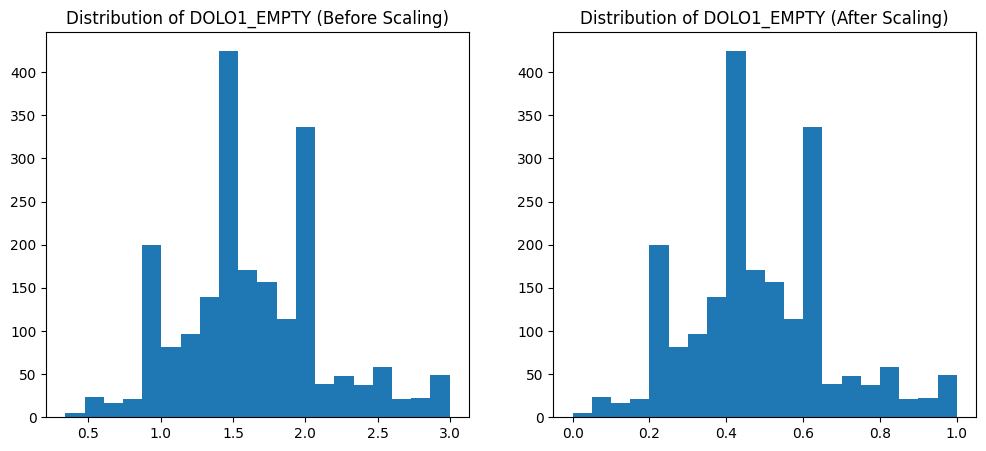

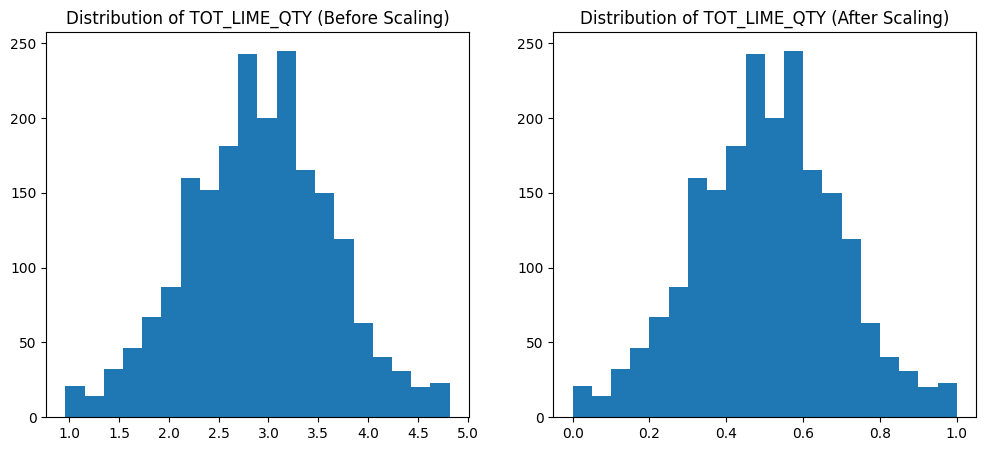

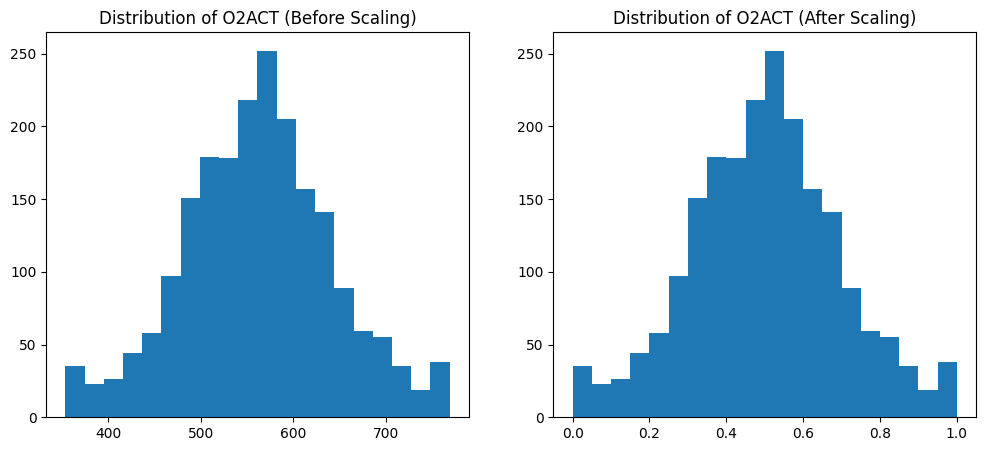

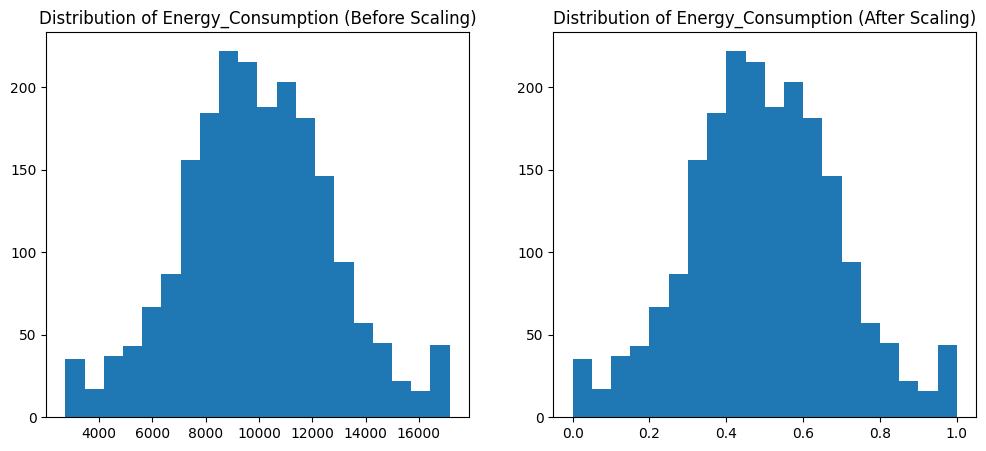

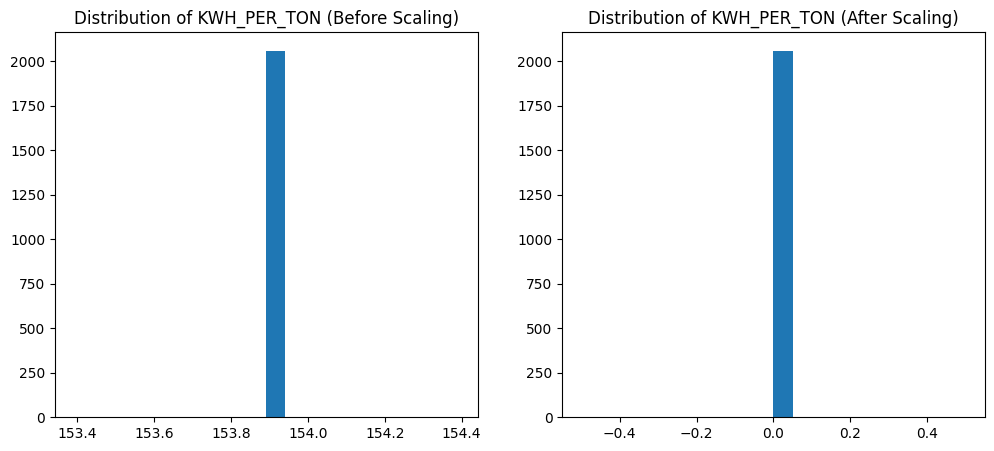

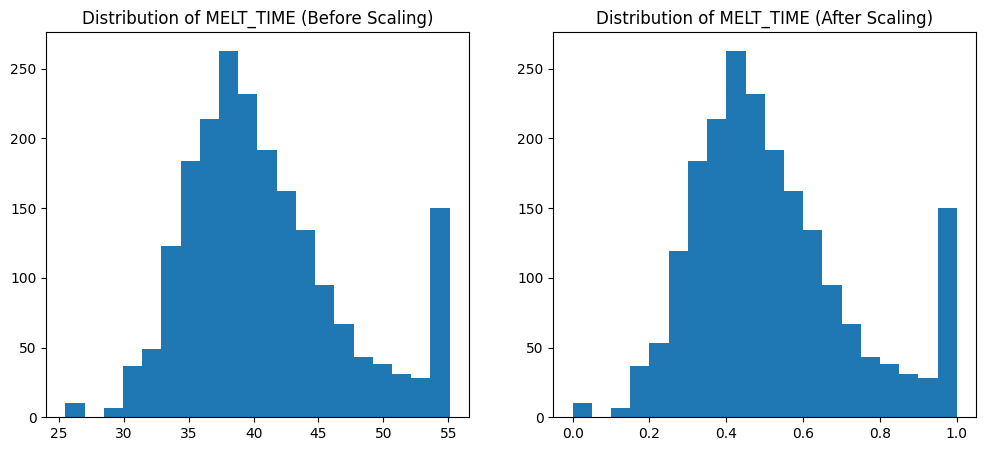

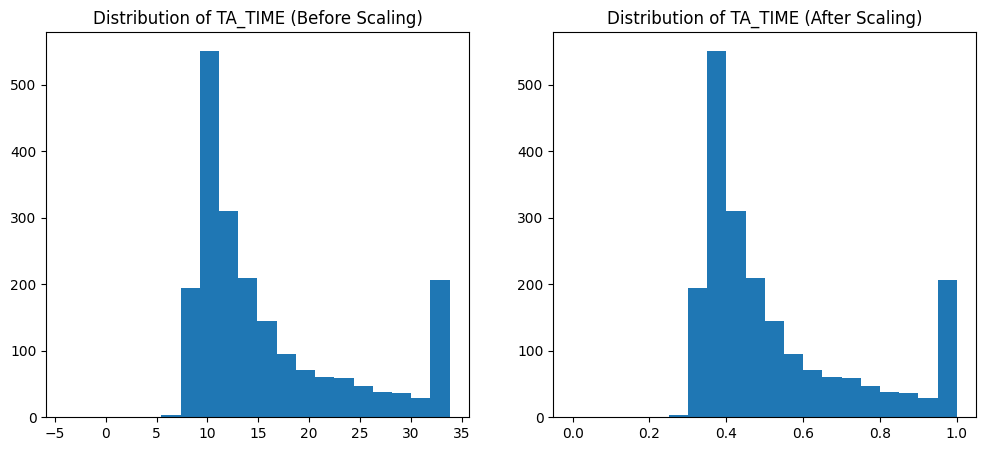

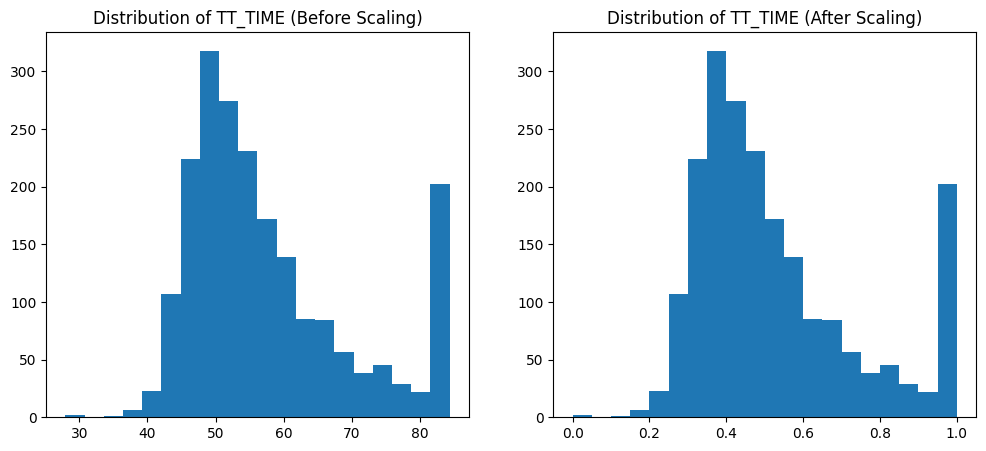

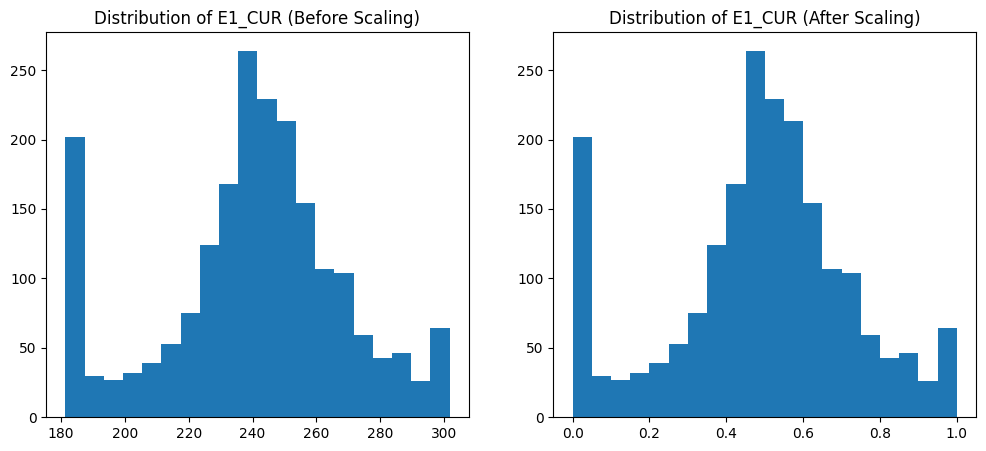

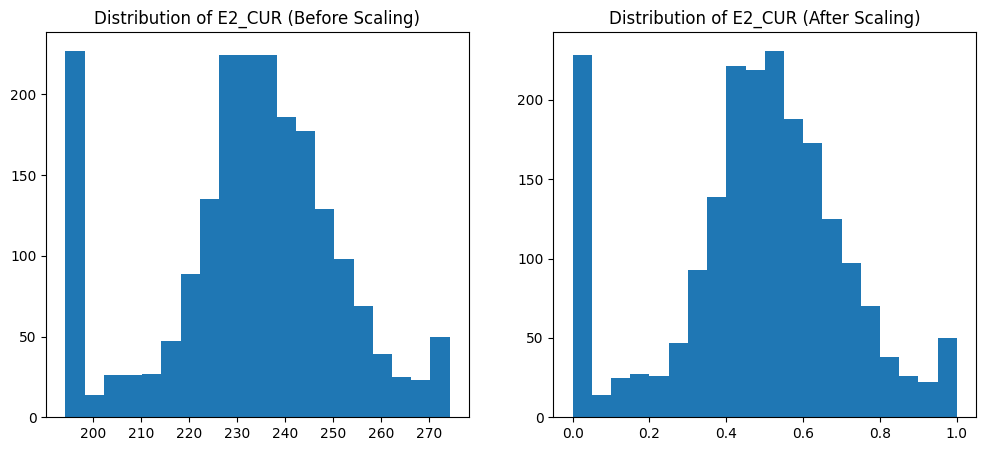

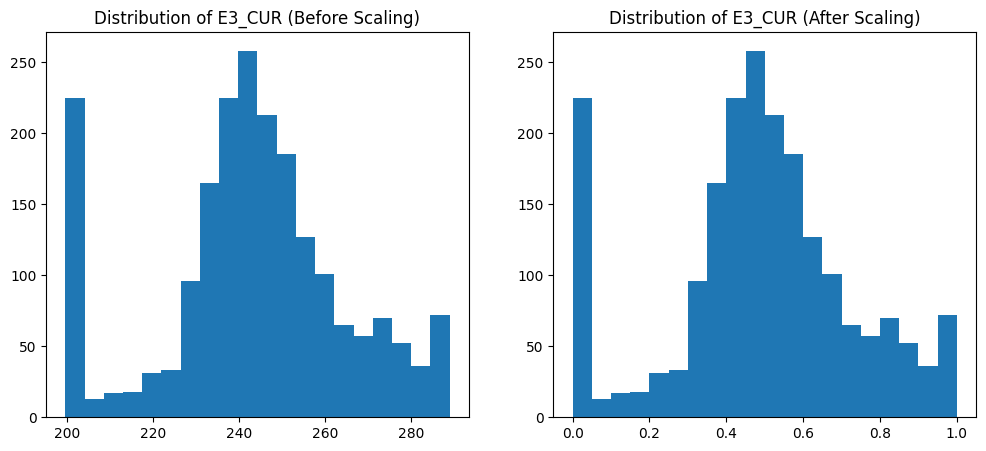

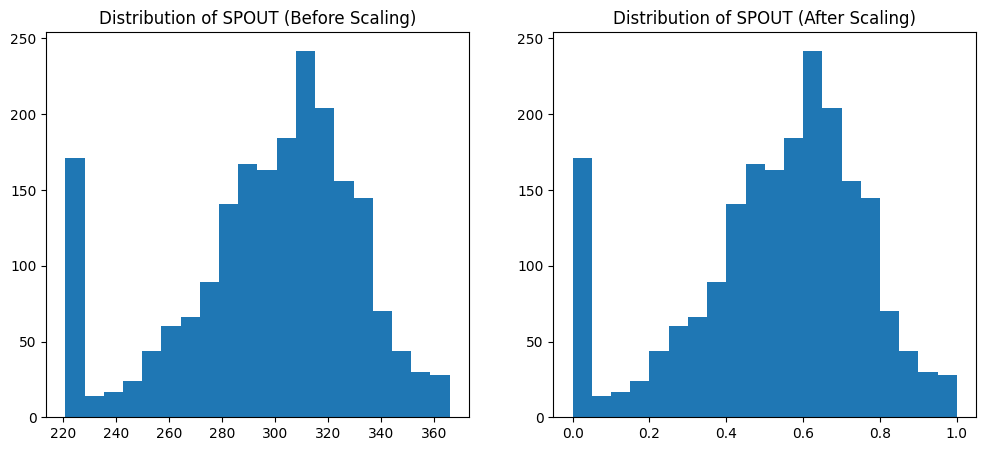

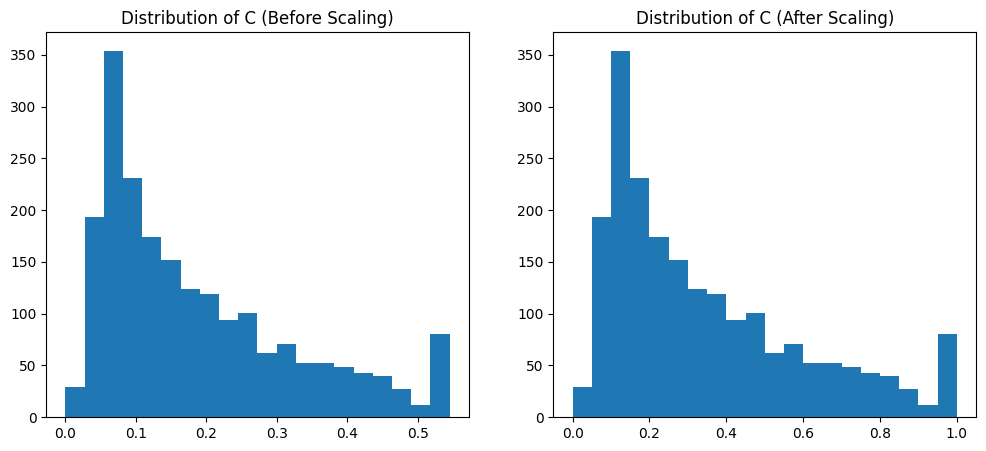

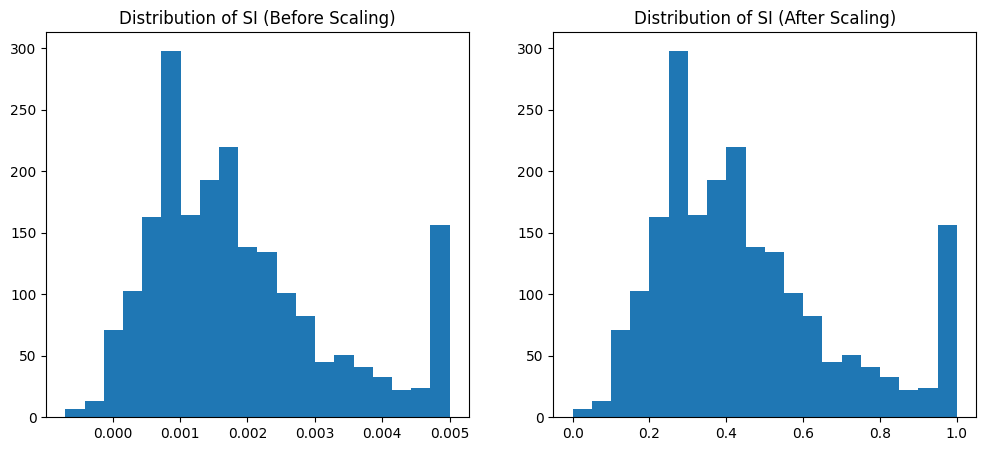

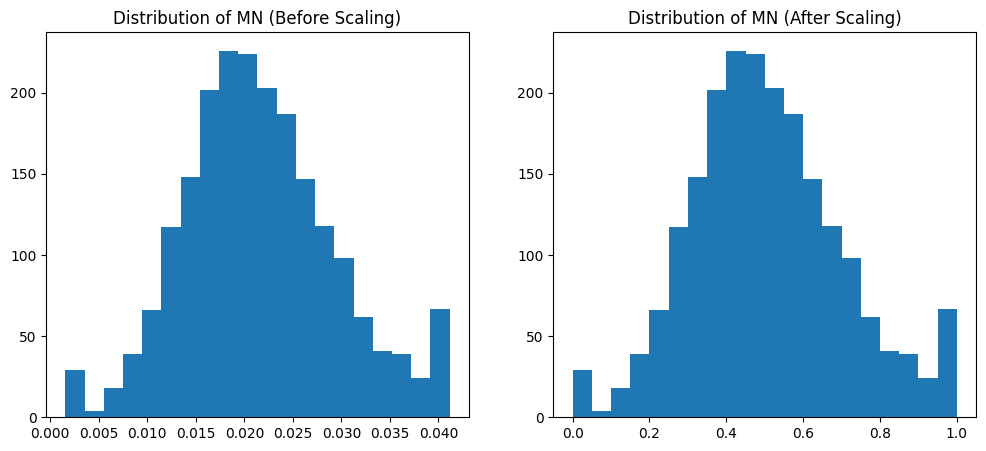

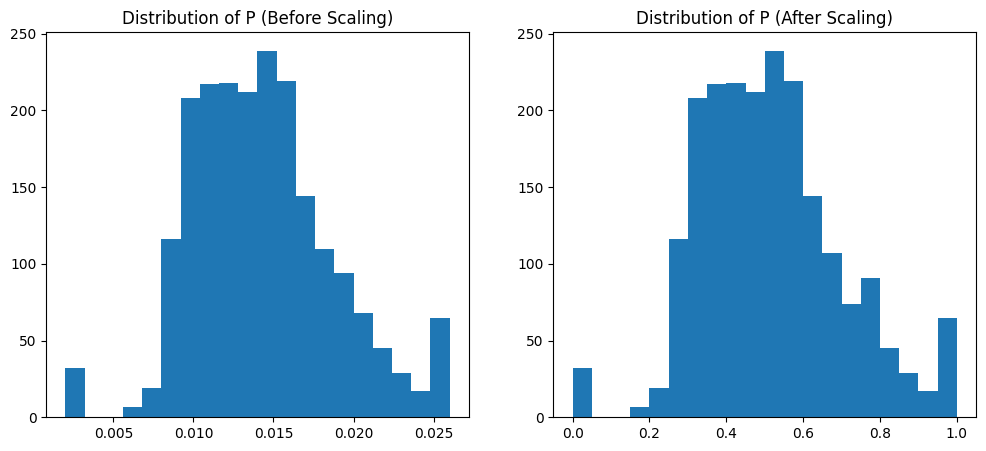

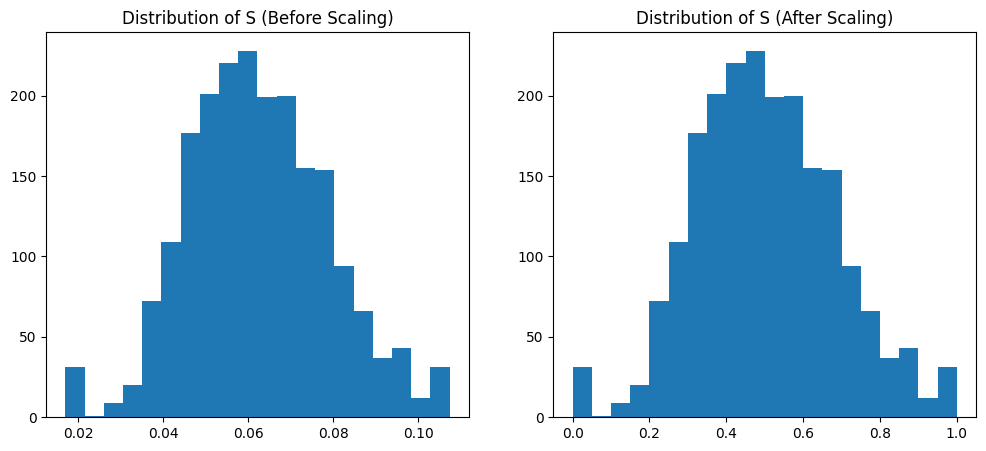

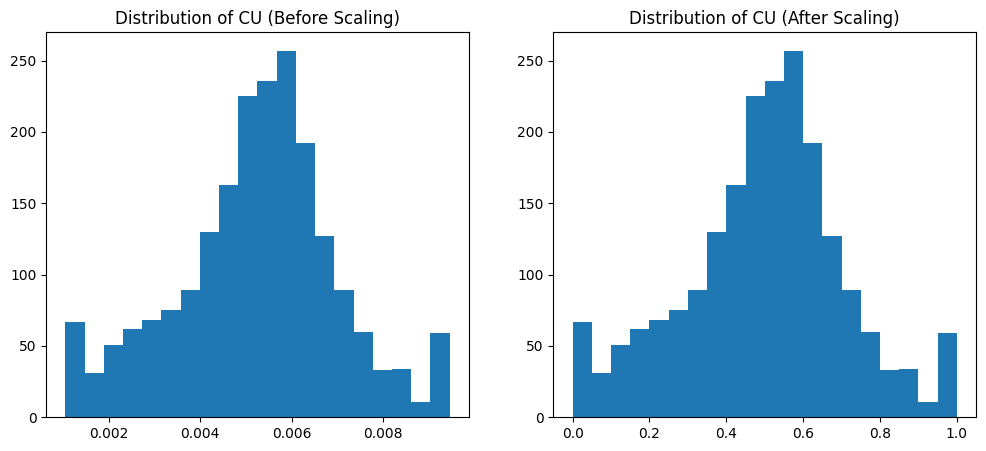

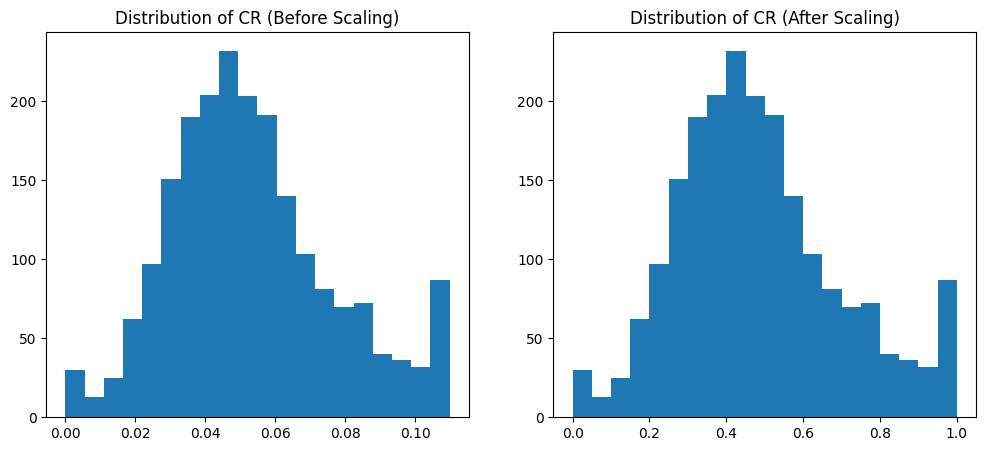

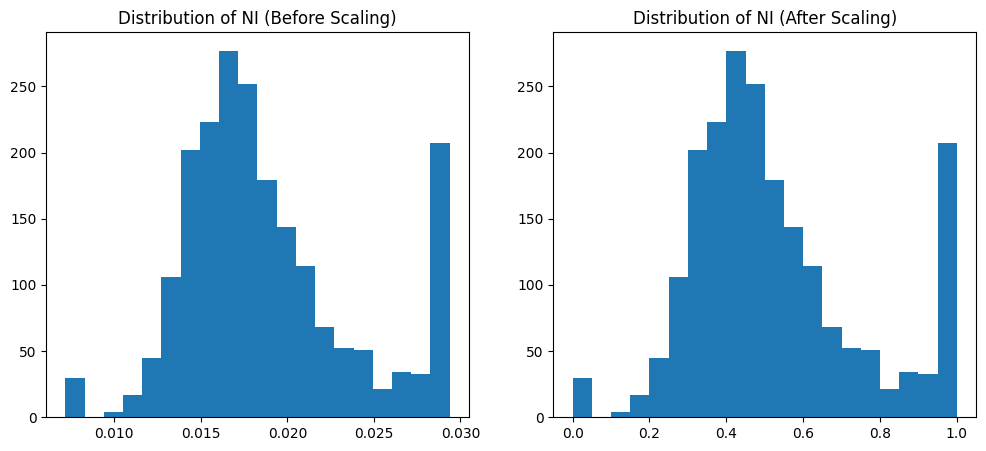

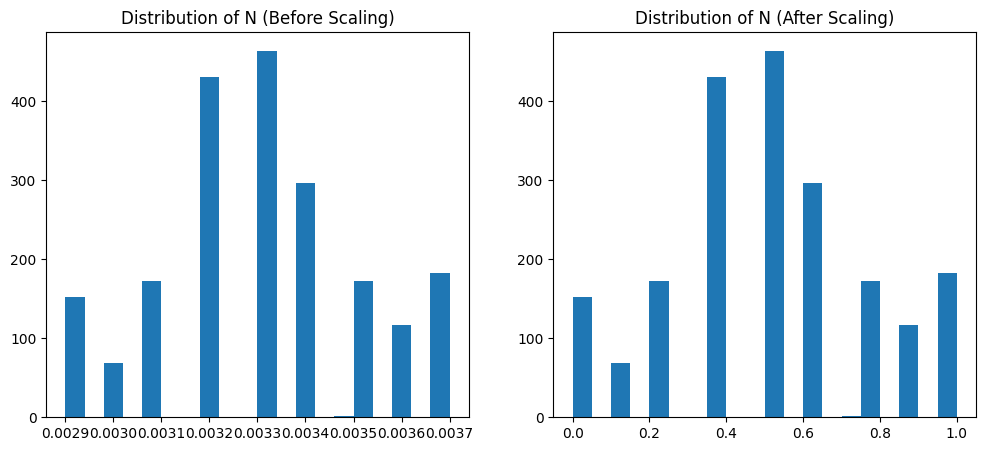

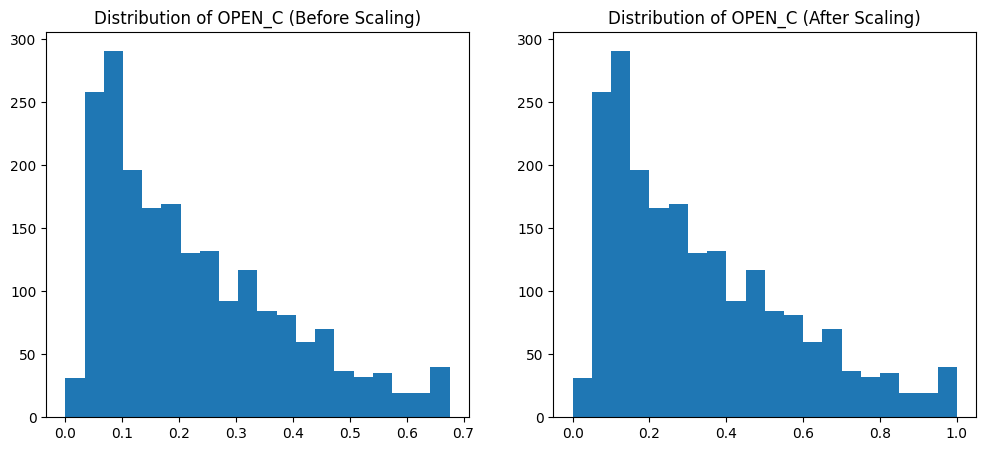

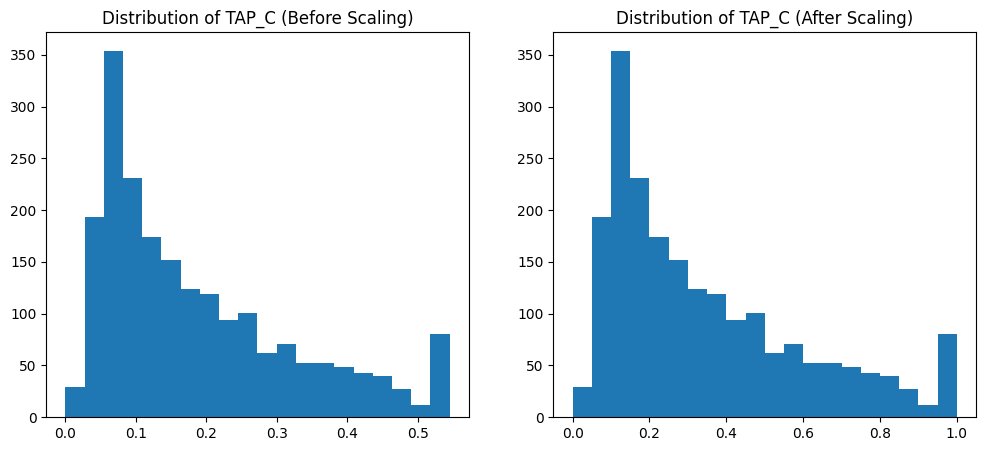

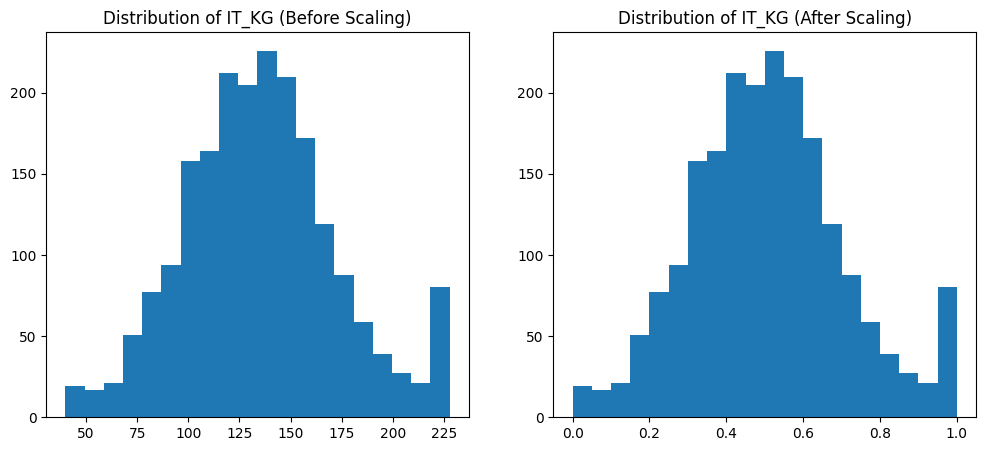

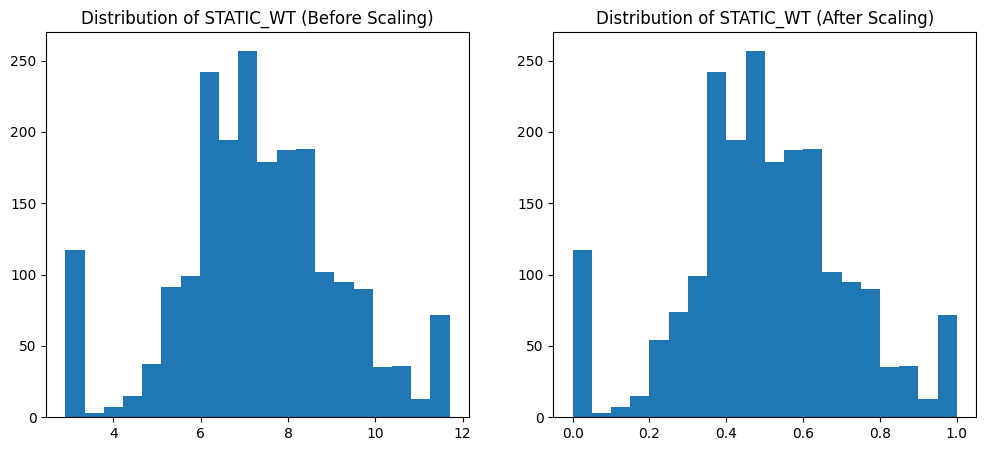

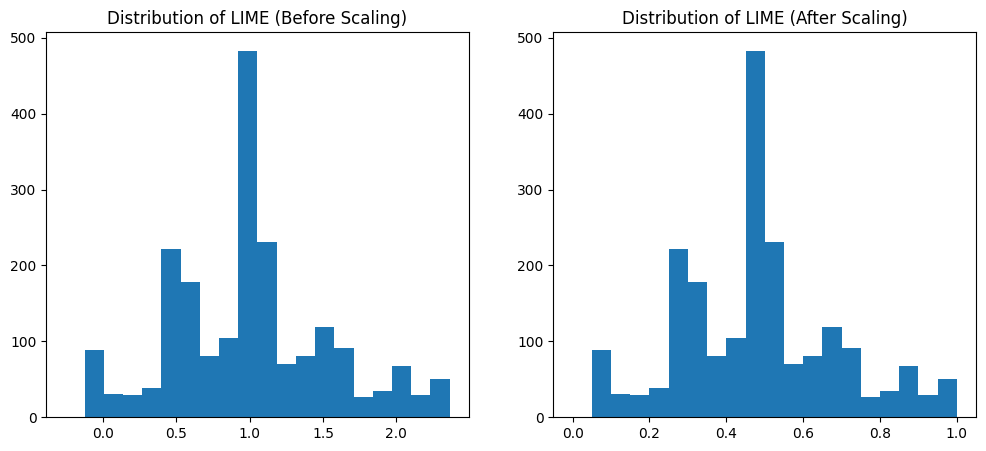

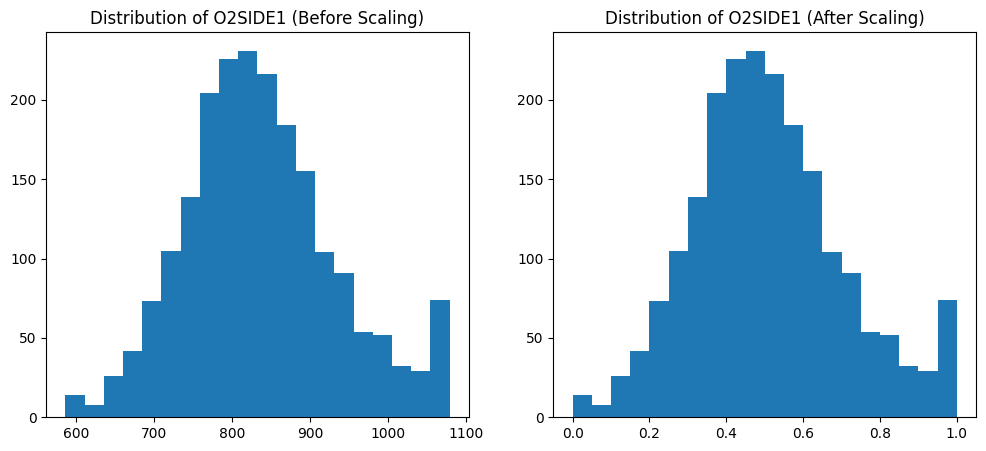

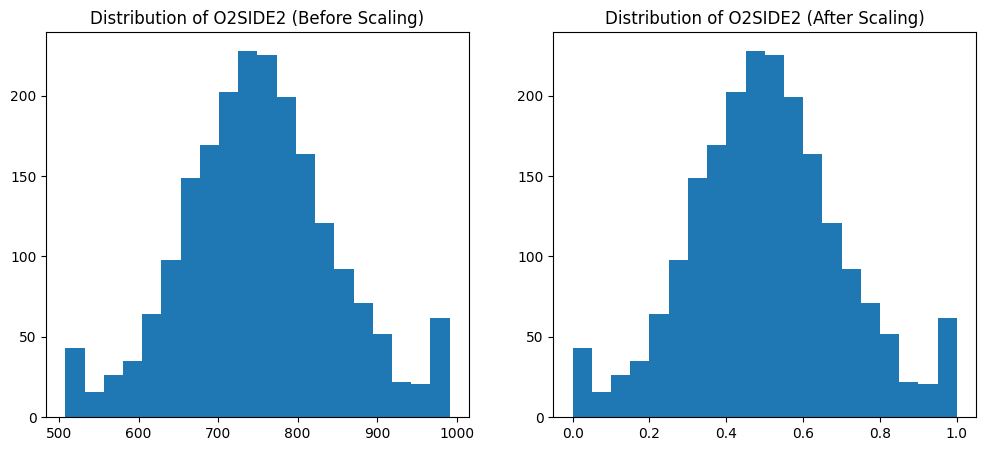

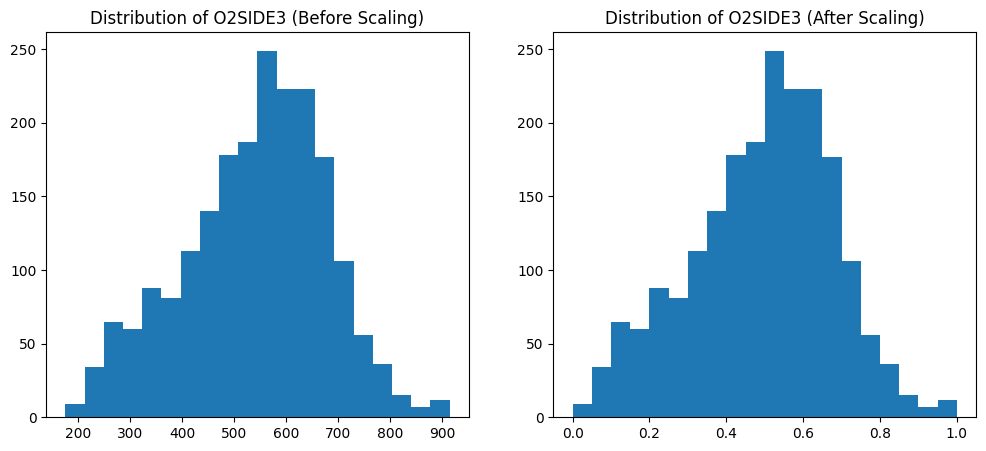

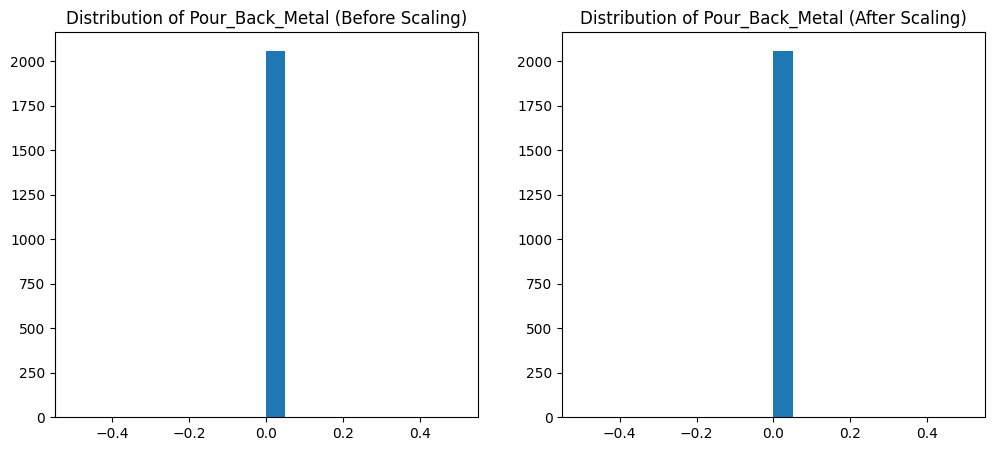

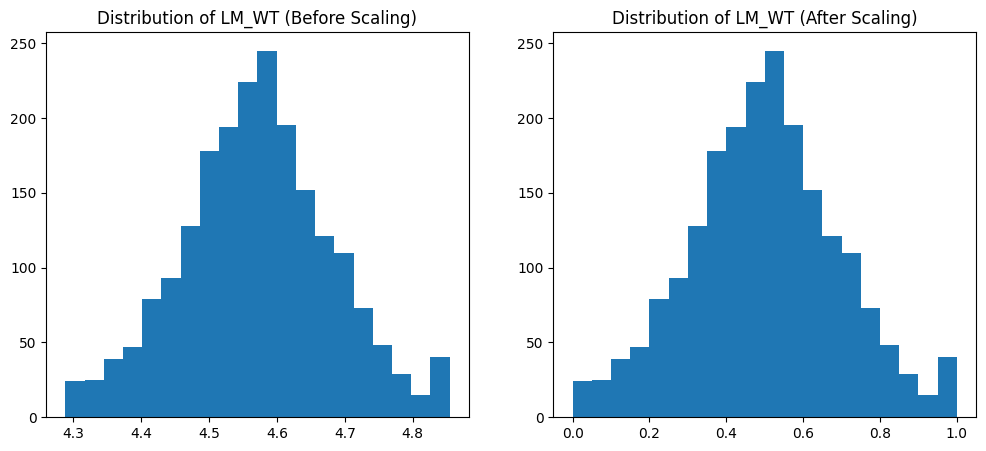

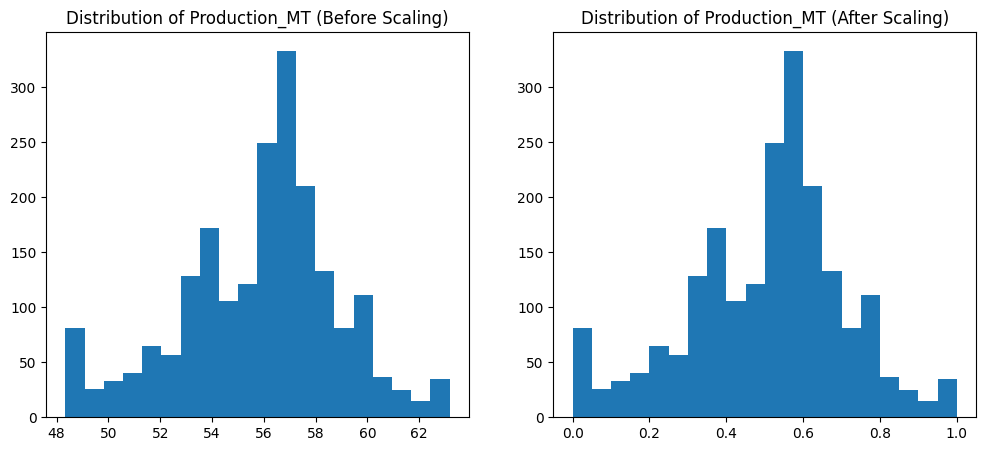

In [48]:
# prompt: now use feature scaling and show before and after featuring plot

import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Select the columns to scale (assuming all ratio columns need scaling)
cols_to_scale = ratio_cols

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to the data and transform it
df_scaled = df.copy()  # Create a copy to avoid modifying the original DataFrame
df_scaled[cols_to_scale] = scaler.fit_transform(df_scaled[cols_to_scale])

# Plot histograms for each ratio column before and after scaling
for col in cols_to_scale:
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.hist(df[col], bins=20)
    plt.title(f'Distribution of {col} (Before Scaling)')

    plt.subplot(1, 2, 2)
    plt.hist(df_scaled[col], bins=20)
    plt.title(f'Distribution of {col} (After Scaling)')

    plt.show()


In [49]:
# Download the cleaned and scaled data
from google.colab import files
df_scaled.to_csv('cleaned_data.csv', index=False)
files.download('cleaned_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>